# 데이터 로드 및 전처리

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib

#한글꺠짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
data=pd.read_csv("./data/Fault_data.csv",encoding="EUC-KR")
data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True)
data.dropna(axis=1,inplace=True)

#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,...,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,0,35,0,...,17.350926,0.032832,35.011650,0.127077,0,35,0,0.405343,45.124841,3.079182
1,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,0,27,0,...,1.466280,0.020858,35.550245,0.063540,0,27,0,1.923012,45.350277,15.004887
2,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,0,15,0,...,13.098728,0.021635,36.013373,0.063538,0,15,0,0.161640,45.071393,0.977516


# 평가 지표 함수

In [3]:
# 평가 지표 출력 함수
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 MAPE 값은 {:.3f}".format(mean_absolute_percentage_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

# 모델 학습 및 예측
- Learning Rate (0~1)
- gamma: 트리 끝 노드의 수
- lambda: 출력값 패널티

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5,shuffle =True)

# GAMMA에 따른 변화

In [5]:

from xgboost import XGBRegressor
X_train, X_eval, Y_train, Y_eval = train_test_split(X_train, Y_train, test_size=0.2, random_state=5,shuffle =True)

eval_set = [(X_eval, Y_eval)]

ccp_alpha_list = list(np.arange(1,50,1))
#ccp_alpha_list = [0.1,0.5,0.9]

train_scores =[]
test_scores =[]

for alpha in ccp_alpha_list:

    clf = XGBRegressor(use_label_encoder = False,
                        n_estimators = 200,
                        learning_rate = 0.02,
                        min_child_weight = 4,
                        colsample_bytree = 0.7,
                        max_depth = 8 , gamma = alpha, reg_lambda = 2)

    clf.fit(X_train,Y_train,eval_set = eval_set,early_stopping_rounds = 10)

    preds_train = clf.predict(X_train)
    preds = clf.predict(X_test)

    train_scores.append(mean_absolute_error(Y_train,preds_train))
    test_scores.append(mean_absolute_error(Y_test,preds))



[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation_0-rmse:87.24557
[3]	validation_0-rmse:86.20985
[4]	validation_0-rmse:85.19685
[5]	validation_0-rmse:84.22149
[6]	validation_0-rmse:83.50307
[7]	validation_0-rmse:82.55157
[8]	validation_0-rmse:81.59878
[9]	validation_0-rmse:80.70102
[10]	validation_0-rmse:80.17472
[11]	validation_0-rmse:79.54433
[12]	validation_0-rmse:78.94772
[13]	validation_0-rmse:78.23814
[14]	validation_0-rmse:77.22063
[15]	validation_0-rmse:76.30923
[16]	validation_0-rmse:75.31924
[17]	validation_0-rmse:74.48143
[18]	validation_0-rmse:73.78475
[19]	validation_0-rmse:73.28781
[20]	validation_0-rmse:72.90684
[21]	validation_0-rmse:72.14568
[22]	validation_0-rmse:71.53054
[23]	validation_0-rmse:70.68778
[24]	validation_0-rmse:69.96781
[25]	validation_0-rmse:69.17341
[26]	validation_0-rmse:68.37144
[27]	validation_0-rmse:67.83051
[28]	validation_0-rmse:67.50655
[29]	validation_0-rmse:67.08139
[30]	validation_0-rmse:66.26784
[31]	validation_0-

[60]	validation_0-rmse:55.37501
[61]	validation_0-rmse:55.20633
[62]	validation_0-rmse:54.86554
[63]	validation_0-rmse:54.72160
[64]	validation_0-rmse:54.24240
[65]	validation_0-rmse:54.07860
[66]	validation_0-rmse:53.89732
[67]	validation_0-rmse:53.53572
[68]	validation_0-rmse:53.33589
[69]	validation_0-rmse:53.08067
[70]	validation_0-rmse:52.67317
[71]	validation_0-rmse:52.49713
[72]	validation_0-rmse:52.17208
[73]	validation_0-rmse:51.99761
[74]	validation_0-rmse:51.84567
[75]	validation_0-rmse:51.46494
[76]	validation_0-rmse:51.12461
[77]	validation_0-rmse:50.76908
[78]	validation_0-rmse:50.62687
[79]	validation_0-rmse:50.48475
[80]	validation_0-rmse:50.29434
[81]	validation_0-rmse:50.19423
[82]	validation_0-rmse:49.92437
[83]	validation_0-rmse:49.75338
[84]	validation_0-rmse:49.58959
[85]	validation_0-rmse:49.33099
[86]	validation_0-rmse:49.22816
[87]	validation_0-rmse:49.13655
[88]	validation_0-rmse:48.89767
[89]	validation_0-rmse:48.63802
[90]	validation_0-rmse:48.46061
[91]	val

[120]	validation_0-rmse:44.41434
[121]	validation_0-rmse:44.35518
[122]	validation_0-rmse:44.21257
[123]	validation_0-rmse:44.09207
[124]	validation_0-rmse:44.06906
[125]	validation_0-rmse:43.93784
[126]	validation_0-rmse:43.80508
[127]	validation_0-rmse:43.82769
[128]	validation_0-rmse:43.69976
[129]	validation_0-rmse:43.58757
[130]	validation_0-rmse:43.56141
[131]	validation_0-rmse:43.53585
[132]	validation_0-rmse:43.55113
[133]	validation_0-rmse:43.54544
[134]	validation_0-rmse:43.42619
[135]	validation_0-rmse:43.42217
[136]	validation_0-rmse:43.41204
[137]	validation_0-rmse:43.38990
[138]	validation_0-rmse:43.38755
[139]	validation_0-rmse:43.44944
[140]	validation_0-rmse:43.38240
[141]	validation_0-rmse:43.28053
[142]	validation_0-rmse:43.26975
[143]	validation_0-rmse:43.27484
[144]	validation_0-rmse:43.30306
[145]	validation_0-rmse:43.31024
[146]	validation_0-rmse:43.29581
[147]	validation_0-rmse:43.21334
[148]	validation_0-rmse:43.13938
[149]	validation_0-rmse:43.16393
[150]	vali

[172]	validation_0-rmse:42.02236
[173]	validation_0-rmse:42.05598
[174]	validation_0-rmse:42.02795
[175]	validation_0-rmse:41.97219
[176]	validation_0-rmse:41.99714
[177]	validation_0-rmse:41.98069
[178]	validation_0-rmse:41.98808
[179]	validation_0-rmse:41.95959
[180]	validation_0-rmse:41.91721
[181]	validation_0-rmse:41.87171
[182]	validation_0-rmse:41.85220
[183]	validation_0-rmse:41.80807
[184]	validation_0-rmse:41.84611
[185]	validation_0-rmse:41.81758
[186]	validation_0-rmse:41.78312
[187]	validation_0-rmse:41.77417
[188]	validation_0-rmse:41.78319
[189]	validation_0-rmse:41.82304
[190]	validation_0-rmse:41.82091
[191]	validation_0-rmse:41.78128
[192]	validation_0-rmse:41.74413
[193]	validation_0-rmse:41.78193
[194]	validation_0-rmse:41.76403
[195]	validation_0-rmse:41.72035
[196]	validation_0-rmse:41.70823
[197]	validation_0-rmse:41.69681
[198]	validation_0-rmse:41.67156
[199]	validation_0-rmse:41.65449
[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation

[25]	validation_0-rmse:69.18298
[26]	validation_0-rmse:68.38100
[27]	validation_0-rmse:67.84001
[28]	validation_0-rmse:67.51594
[29]	validation_0-rmse:67.09074
[30]	validation_0-rmse:66.27705
[31]	validation_0-rmse:65.71745
[32]	validation_0-rmse:65.10151
[33]	validation_0-rmse:64.41966
[34]	validation_0-rmse:63.98770
[35]	validation_0-rmse:63.61730
[36]	validation_0-rmse:63.05284
[37]	validation_0-rmse:62.50969
[38]	validation_0-rmse:62.01387
[39]	validation_0-rmse:61.46463
[40]	validation_0-rmse:61.14245
[41]	validation_0-rmse:60.81915
[42]	validation_0-rmse:60.45978
[43]	validation_0-rmse:59.91901
[44]	validation_0-rmse:59.68870
[45]	validation_0-rmse:59.31905
[46]	validation_0-rmse:59.06522
[47]	validation_0-rmse:58.79404
[48]	validation_0-rmse:58.39240
[49]	validation_0-rmse:57.91970
[50]	validation_0-rmse:57.58487
[51]	validation_0-rmse:57.32712
[52]	validation_0-rmse:57.08575
[53]	validation_0-rmse:56.86955
[54]	validation_0-rmse:56.46615
[55]	validation_0-rmse:56.26995
[56]	val

[79]	validation_0-rmse:50.32740
[80]	validation_0-rmse:50.26093
[81]	validation_0-rmse:50.16888
[82]	validation_0-rmse:49.89328
[83]	validation_0-rmse:49.71347
[84]	validation_0-rmse:49.55498
[85]	validation_0-rmse:49.29123
[86]	validation_0-rmse:49.13342
[87]	validation_0-rmse:49.03904
[88]	validation_0-rmse:48.79250
[89]	validation_0-rmse:48.52420
[90]	validation_0-rmse:48.37676
[91]	validation_0-rmse:48.29878
[92]	validation_0-rmse:48.07506
[93]	validation_0-rmse:47.75815
[94]	validation_0-rmse:47.74826
[95]	validation_0-rmse:47.63804
[96]	validation_0-rmse:47.43596
[97]	validation_0-rmse:47.33318
[98]	validation_0-rmse:47.25553
[99]	validation_0-rmse:47.03666
[100]	validation_0-rmse:46.83264
[101]	validation_0-rmse:46.65825
[102]	validation_0-rmse:46.47642
[103]	validation_0-rmse:46.28927
[104]	validation_0-rmse:46.24451
[105]	validation_0-rmse:46.16029
[106]	validation_0-rmse:45.97053
[107]	validation_0-rmse:45.81153
[108]	validation_0-rmse:45.66011
[109]	validation_0-rmse:45.6461

[139]	validation_0-rmse:43.19832
[140]	validation_0-rmse:43.13029
[141]	validation_0-rmse:43.11523
[142]	validation_0-rmse:43.10781
[143]	validation_0-rmse:43.11369
[144]	validation_0-rmse:43.14022
[145]	validation_0-rmse:43.05792
[146]	validation_0-rmse:43.04265
[147]	validation_0-rmse:42.95983
[148]	validation_0-rmse:42.88663
[149]	validation_0-rmse:42.92312
[150]	validation_0-rmse:42.84750
[151]	validation_0-rmse:42.76365
[152]	validation_0-rmse:42.78643
[153]	validation_0-rmse:42.81995
[154]	validation_0-rmse:42.71984
[155]	validation_0-rmse:42.73656
[156]	validation_0-rmse:42.63102
[157]	validation_0-rmse:42.61621
[158]	validation_0-rmse:42.61065
[159]	validation_0-rmse:42.62167
[160]	validation_0-rmse:42.55465
[161]	validation_0-rmse:42.49275
[162]	validation_0-rmse:42.43041
[163]	validation_0-rmse:42.34150
[164]	validation_0-rmse:42.27382
[165]	validation_0-rmse:42.29503
[166]	validation_0-rmse:42.25955
[167]	validation_0-rmse:42.27062
[168]	validation_0-rmse:42.24524
[169]	vali

[191]	validation_0-rmse:42.21945
[192]	validation_0-rmse:42.25596
[193]	validation_0-rmse:42.21952
[194]	validation_0-rmse:42.25953
[195]	validation_0-rmse:42.21916
[196]	validation_0-rmse:42.25451
[197]	validation_0-rmse:42.24659
[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation_0-rmse:87.24557
[3]	validation_0-rmse:86.20985
[4]	validation_0-rmse:85.19685
[5]	validation_0-rmse:84.22149
[6]	validation_0-rmse:83.50307
[7]	validation_0-rmse:82.55157
[8]	validation_0-rmse:81.59878
[9]	validation_0-rmse:80.70102
[10]	validation_0-rmse:80.17472
[11]	validation_0-rmse:79.54433
[12]	validation_0-rmse:78.94772
[13]	validation_0-rmse:78.23814
[14]	validation_0-rmse:77.22063
[15]	validation_0-rmse:76.30923
[16]	validation_0-rmse:75.31924
[17]	validation_0-rmse:74.48143
[18]	validation_0-rmse:73.78475
[19]	validation_0-rmse:73.28371
[20]	validation_0-rmse:72.90266
[21]	validation_0-rmse:72.14148
[22]	validation_0-rmse:71.53006
[23]	validation_0-rmse:70.68723
[24]	valida

[51]	validation_0-rmse:56.48434
[52]	validation_0-rmse:56.24175
[53]	validation_0-rmse:56.03975
[54]	validation_0-rmse:55.70314
[55]	validation_0-rmse:55.51260
[56]	validation_0-rmse:55.23573
[57]	validation_0-rmse:54.85386
[58]	validation_0-rmse:54.75921
[59]	validation_0-rmse:54.56132
[60]	validation_0-rmse:54.45056
[61]	validation_0-rmse:54.29715
[62]	validation_0-rmse:53.95799
[63]	validation_0-rmse:53.81489
[64]	validation_0-rmse:53.34961
[65]	validation_0-rmse:53.18985
[66]	validation_0-rmse:53.00736
[67]	validation_0-rmse:52.64449
[68]	validation_0-rmse:52.38252
[69]	validation_0-rmse:52.29510
[70]	validation_0-rmse:52.00175
[71]	validation_0-rmse:51.76294
[72]	validation_0-rmse:51.43522
[73]	validation_0-rmse:51.32366
[74]	validation_0-rmse:51.17281
[75]	validation_0-rmse:50.99878
[76]	validation_0-rmse:50.66098
[77]	validation_0-rmse:50.30108
[78]	validation_0-rmse:50.15880
[79]	validation_0-rmse:50.01264
[80]	validation_0-rmse:49.82075
[81]	validation_0-rmse:49.72700
[82]	val

[105]	validation_0-rmse:45.80579
[106]	validation_0-rmse:45.61725
[107]	validation_0-rmse:45.45608
[108]	validation_0-rmse:45.30165
[109]	validation_0-rmse:45.29135
[110]	validation_0-rmse:45.11535
[111]	validation_0-rmse:44.95686
[112]	validation_0-rmse:44.90919
[113]	validation_0-rmse:44.91716
[114]	validation_0-rmse:44.75208
[115]	validation_0-rmse:44.61174
[116]	validation_0-rmse:44.47001
[117]	validation_0-rmse:44.42069
[118]	validation_0-rmse:44.28562
[119]	validation_0-rmse:44.15442
[120]	validation_0-rmse:44.11570
[121]	validation_0-rmse:44.06093
[122]	validation_0-rmse:43.93778
[123]	validation_0-rmse:43.79686
[124]	validation_0-rmse:43.76945
[125]	validation_0-rmse:43.63618
[126]	validation_0-rmse:43.58556
[127]	validation_0-rmse:43.54677
[128]	validation_0-rmse:43.41159
[129]	validation_0-rmse:43.30206
[130]	validation_0-rmse:43.29970
[131]	validation_0-rmse:43.27459
[132]	validation_0-rmse:43.28648
[133]	validation_0-rmse:43.27850
[134]	validation_0-rmse:43.15813
[135]	vali

[57]	validation_0-rmse:54.85030
[58]	validation_0-rmse:54.75465
[59]	validation_0-rmse:54.55974
[60]	validation_0-rmse:54.45226
[61]	validation_0-rmse:54.29924
[62]	validation_0-rmse:53.96022
[63]	validation_0-rmse:53.81722
[64]	validation_0-rmse:53.33207
[65]	validation_0-rmse:53.18751
[66]	validation_0-rmse:52.95449
[67]	validation_0-rmse:52.58924
[68]	validation_0-rmse:52.32909
[69]	validation_0-rmse:52.07530
[70]	validation_0-rmse:51.66900
[71]	validation_0-rmse:51.43025
[72]	validation_0-rmse:51.10093
[73]	validation_0-rmse:50.98898
[74]	validation_0-rmse:50.83616
[75]	validation_0-rmse:50.66096
[76]	validation_0-rmse:50.32152
[77]	validation_0-rmse:50.20668
[78]	validation_0-rmse:50.06493
[79]	validation_0-rmse:49.86675
[80]	validation_0-rmse:49.67467
[81]	validation_0-rmse:49.33157
[82]	validation_0-rmse:49.05501
[83]	validation_0-rmse:48.89572
[84]	validation_0-rmse:48.74510
[85]	validation_0-rmse:48.48348
[86]	validation_0-rmse:48.32374
[87]	validation_0-rmse:48.22838
[88]	val

[110]	validation_0-rmse:44.45147
[111]	validation_0-rmse:44.44032
[112]	validation_0-rmse:44.39088
[113]	validation_0-rmse:44.39840
[114]	validation_0-rmse:44.23124
[115]	validation_0-rmse:44.09005
[116]	validation_0-rmse:43.95055
[117]	validation_0-rmse:43.90129
[118]	validation_0-rmse:43.85797
[119]	validation_0-rmse:43.71934
[120]	validation_0-rmse:43.56771
[121]	validation_0-rmse:43.50848
[122]	validation_0-rmse:43.38429
[123]	validation_0-rmse:43.33043
[124]	validation_0-rmse:43.30613
[125]	validation_0-rmse:43.17412
[126]	validation_0-rmse:43.12301
[127]	validation_0-rmse:43.14439
[128]	validation_0-rmse:43.01116
[129]	validation_0-rmse:42.89714
[130]	validation_0-rmse:42.88823
[131]	validation_0-rmse:42.86118
[132]	validation_0-rmse:42.87305
[133]	validation_0-rmse:42.86457
[134]	validation_0-rmse:42.74160
[135]	validation_0-rmse:42.76453
[136]	validation_0-rmse:42.80821
[137]	validation_0-rmse:42.70842
[138]	validation_0-rmse:42.74375
[139]	validation_0-rmse:42.64799
[140]	vali

[168]	validation_0-rmse:42.11181
[169]	validation_0-rmse:42.06666
[170]	validation_0-rmse:42.00634
[171]	validation_0-rmse:41.99382
[172]	validation_0-rmse:42.01390
[173]	validation_0-rmse:42.04456
[174]	validation_0-rmse:41.98338
[175]	validation_0-rmse:41.94589
[176]	validation_0-rmse:41.95792
[177]	validation_0-rmse:41.92827
[178]	validation_0-rmse:41.95884
[179]	validation_0-rmse:41.93319
[180]	validation_0-rmse:41.88658
[181]	validation_0-rmse:41.83823
[182]	validation_0-rmse:41.83499
[183]	validation_0-rmse:41.80352
[184]	validation_0-rmse:41.84192
[185]	validation_0-rmse:41.76755
[186]	validation_0-rmse:41.79265
[187]	validation_0-rmse:41.77314
[188]	validation_0-rmse:41.77420
[189]	validation_0-rmse:41.72585
[190]	validation_0-rmse:41.72129
[191]	validation_0-rmse:41.69380
[192]	validation_0-rmse:41.67119
[193]	validation_0-rmse:41.64388
[194]	validation_0-rmse:41.67159
[195]	validation_0-rmse:41.69198
[196]	validation_0-rmse:41.72714
[197]	validation_0-rmse:41.72595
[198]	vali

[21]	validation_0-rmse:71.29703
[22]	validation_0-rmse:70.62856
[23]	validation_0-rmse:69.78992
[24]	validation_0-rmse:69.07394
[25]	validation_0-rmse:68.28054
[26]	validation_0-rmse:67.47791
[27]	validation_0-rmse:66.93804
[28]	validation_0-rmse:66.61357
[29]	validation_0-rmse:65.78001
[30]	validation_0-rmse:64.97391
[31]	validation_0-rmse:64.41624
[32]	validation_0-rmse:64.04067
[33]	validation_0-rmse:63.35496
[34]	validation_0-rmse:62.61759
[35]	validation_0-rmse:62.19049
[36]	validation_0-rmse:61.74791
[37]	validation_0-rmse:61.37817
[38]	validation_0-rmse:61.03173
[39]	validation_0-rmse:60.48741
[40]	validation_0-rmse:60.16963
[41]	validation_0-rmse:59.85531
[42]	validation_0-rmse:59.49939
[43]	validation_0-rmse:58.93949
[44]	validation_0-rmse:58.72138
[45]	validation_0-rmse:58.36496
[46]	validation_0-rmse:58.11541
[47]	validation_0-rmse:57.83953
[48]	validation_0-rmse:57.44363
[49]	validation_0-rmse:56.96106
[50]	validation_0-rmse:56.63197
[51]	validation_0-rmse:56.40325
[52]	val

[75]	validation_0-rmse:50.49062
[76]	validation_0-rmse:50.15062
[77]	validation_0-rmse:50.06068
[78]	validation_0-rmse:49.91620
[79]	validation_0-rmse:49.72039
[80]	validation_0-rmse:49.65431
[81]	validation_0-rmse:49.31170
[82]	validation_0-rmse:49.03780
[83]	validation_0-rmse:48.86429
[84]	validation_0-rmse:48.69872
[85]	validation_0-rmse:48.44165
[86]	validation_0-rmse:48.33065
[87]	validation_0-rmse:48.08196
[88]	validation_0-rmse:47.84120
[89]	validation_0-rmse:47.60688
[90]	validation_0-rmse:47.43518
[91]	validation_0-rmse:47.35674
[92]	validation_0-rmse:47.13310
[93]	validation_0-rmse:46.81858
[94]	validation_0-rmse:46.75371
[95]	validation_0-rmse:46.64288
[96]	validation_0-rmse:46.44451
[97]	validation_0-rmse:46.23309
[98]	validation_0-rmse:46.13633
[99]	validation_0-rmse:45.94058
[100]	validation_0-rmse:45.73830
[101]	validation_0-rmse:45.56350
[102]	validation_0-rmse:45.38322
[103]	validation_0-rmse:45.20945
[104]	validation_0-rmse:45.16152
[105]	validation_0-rmse:45.07982
[1

[129]	validation_0-rmse:43.03389
[130]	validation_0-rmse:43.03364
[131]	validation_0-rmse:43.00867
[132]	validation_0-rmse:43.02435
[133]	validation_0-rmse:43.02172
[134]	validation_0-rmse:42.89724
[135]	validation_0-rmse:42.91353
[136]	validation_0-rmse:42.95559
[137]	validation_0-rmse:42.91558
[138]	validation_0-rmse:42.96236
[139]	validation_0-rmse:42.86464
[140]	validation_0-rmse:42.82671
[141]	validation_0-rmse:42.87139
[142]	validation_0-rmse:42.89514
[143]	validation_0-rmse:42.89930
[144]	validation_0-rmse:42.94248
[145]	validation_0-rmse:42.97658
[146]	validation_0-rmse:42.89806
[147]	validation_0-rmse:42.94035
[148]	validation_0-rmse:42.86668
[149]	validation_0-rmse:42.91015
[150]	validation_0-rmse:42.94513
[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation_0-rmse:87.24557
[3]	validation_0-rmse:86.20985
[4]	validation_0-rmse:85.19685
[5]	validation_0-rmse:84.22149
[6]	validation_0-rmse:83.50818
[7]	validation_0-rmse:82.55667
[8]	validation_0-rmse:81.6

[82]	validation_0-rmse:49.50818
[83]	validation_0-rmse:49.34222
[84]	validation_0-rmse:49.17829
[85]	validation_0-rmse:48.91990
[86]	validation_0-rmse:48.75736
[87]	validation_0-rmse:48.66318
[88]	validation_0-rmse:48.42073
[89]	validation_0-rmse:48.18167
[90]	validation_0-rmse:48.01019
[91]	validation_0-rmse:47.93131
[92]	validation_0-rmse:47.70729
[93]	validation_0-rmse:47.39168
[94]	validation_0-rmse:47.33286
[95]	validation_0-rmse:47.02840
[96]	validation_0-rmse:46.82962
[97]	validation_0-rmse:46.71779
[98]	validation_0-rmse:46.64344
[99]	validation_0-rmse:46.42621
[100]	validation_0-rmse:46.24460
[101]	validation_0-rmse:46.06312
[102]	validation_0-rmse:45.88274
[103]	validation_0-rmse:45.70616
[104]	validation_0-rmse:45.65915
[105]	validation_0-rmse:45.58023
[106]	validation_0-rmse:45.39018
[107]	validation_0-rmse:45.23212
[108]	validation_0-rmse:45.07895
[109]	validation_0-rmse:45.06965
[110]	validation_0-rmse:44.89371
[111]	validation_0-rmse:44.72895
[112]	validation_0-rmse:44.6

[184]	validation_0-rmse:41.58646
[185]	validation_0-rmse:41.58009
[186]	validation_0-rmse:41.60580
[187]	validation_0-rmse:41.61596
[188]	validation_0-rmse:41.58937
[189]	validation_0-rmse:41.62605
[190]	validation_0-rmse:41.62366
[191]	validation_0-rmse:41.63565
[192]	validation_0-rmse:41.60757
[193]	validation_0-rmse:41.57991
[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation_0-rmse:87.24557
[3]	validation_0-rmse:86.20985
[4]	validation_0-rmse:85.19685
[5]	validation_0-rmse:84.22149
[6]	validation_0-rmse:83.50818
[7]	validation_0-rmse:82.55667
[8]	validation_0-rmse:81.60388
[9]	validation_0-rmse:80.70614
[10]	validation_0-rmse:79.77931
[11]	validation_0-rmse:78.69933
[12]	validation_0-rmse:78.09972
[13]	validation_0-rmse:77.39391
[14]	validation_0-rmse:76.37524
[15]	validation_0-rmse:75.46529
[16]	validation_0-rmse:74.47372
[17]	validation_0-rmse:73.60648
[18]	validation_0-rmse:72.92214
[19]	validation_0-rmse:72.42302
[20]	validation_0-rmse:72.05982
[21]	val

[44]	validation_0-rmse:60.01601
[45]	validation_0-rmse:59.64935
[46]	validation_0-rmse:59.39603
[47]	validation_0-rmse:59.10983
[48]	validation_0-rmse:58.70890
[49]	validation_0-rmse:58.24023
[50]	validation_0-rmse:57.90458
[51]	validation_0-rmse:57.69546
[52]	validation_0-rmse:57.45684
[53]	validation_0-rmse:57.25286
[54]	validation_0-rmse:56.85120
[55]	validation_0-rmse:56.65979
[56]	validation_0-rmse:56.37977
[57]	validation_0-rmse:56.00123
[58]	validation_0-rmse:55.81190
[59]	validation_0-rmse:55.52064
[60]	validation_0-rmse:55.40717
[61]	validation_0-rmse:55.24431
[62]	validation_0-rmse:54.90365
[63]	validation_0-rmse:54.74761
[64]	validation_0-rmse:54.26883
[65]	validation_0-rmse:54.11899
[66]	validation_0-rmse:53.93676
[67]	validation_0-rmse:53.57410
[68]	validation_0-rmse:53.37209
[69]	validation_0-rmse:53.11654
[70]	validation_0-rmse:52.70916
[71]	validation_0-rmse:52.53730
[72]	validation_0-rmse:52.21145
[73]	validation_0-rmse:52.03321
[74]	validation_0-rmse:51.88123
[75]	val

[98]	validation_0-rmse:47.15390
[99]	validation_0-rmse:46.94084
[100]	validation_0-rmse:46.75772
[101]	validation_0-rmse:46.57742
[102]	validation_0-rmse:46.39940
[103]	validation_0-rmse:46.22284
[104]	validation_0-rmse:46.17611
[105]	validation_0-rmse:46.09226
[106]	validation_0-rmse:45.90432
[107]	validation_0-rmse:45.74739
[108]	validation_0-rmse:45.59174
[109]	validation_0-rmse:45.57570
[110]	validation_0-rmse:45.40369
[111]	validation_0-rmse:45.24888
[112]	validation_0-rmse:45.20045
[113]	validation_0-rmse:45.21433
[114]	validation_0-rmse:45.05048
[115]	validation_0-rmse:44.91280
[116]	validation_0-rmse:44.77797
[117]	validation_0-rmse:44.73113
[118]	validation_0-rmse:44.59825
[119]	validation_0-rmse:44.46052
[120]	validation_0-rmse:44.31290
[121]	validation_0-rmse:44.25654
[122]	validation_0-rmse:44.13924
[123]	validation_0-rmse:43.99985
[124]	validation_0-rmse:43.97962
[125]	validation_0-rmse:43.84745
[126]	validation_0-rmse:43.70741
[127]	validation_0-rmse:43.73095
[128]	valida

[150]	validation_0-rmse:43.16746
[151]	validation_0-rmse:43.10112
[152]	validation_0-rmse:43.12473
[153]	validation_0-rmse:43.17124
[154]	validation_0-rmse:43.10173
[155]	validation_0-rmse:43.10862
[156]	validation_0-rmse:43.02361
[157]	validation_0-rmse:43.00372
[158]	validation_0-rmse:42.99730
[159]	validation_0-rmse:42.93885
[160]	validation_0-rmse:42.87275
[161]	validation_0-rmse:42.81644
[162]	validation_0-rmse:42.75363
[163]	validation_0-rmse:42.69285
[164]	validation_0-rmse:42.62643
[165]	validation_0-rmse:42.63045
[166]	validation_0-rmse:42.60543
[167]	validation_0-rmse:42.56008
[168]	validation_0-rmse:42.53207
[169]	validation_0-rmse:42.49110
[170]	validation_0-rmse:42.43224
[171]	validation_0-rmse:42.45770
[172]	validation_0-rmse:42.38382
[173]	validation_0-rmse:42.41707
[174]	validation_0-rmse:42.45028
[175]	validation_0-rmse:42.39742
[176]	validation_0-rmse:42.41865
[177]	validation_0-rmse:42.38746
[178]	validation_0-rmse:42.39718
[179]	validation_0-rmse:42.37076
[180]	vali

[2]	validation_0-rmse:87.25475
[3]	validation_0-rmse:86.21901
[4]	validation_0-rmse:85.20609
[5]	validation_0-rmse:84.23080
[6]	validation_0-rmse:83.51761
[7]	validation_0-rmse:82.56614
[8]	validation_0-rmse:81.61337
[9]	validation_0-rmse:80.71561
[10]	validation_0-rmse:80.18955
[11]	validation_0-rmse:79.57001
[12]	validation_0-rmse:78.97322
[13]	validation_0-rmse:78.26797
[14]	validation_0-rmse:77.24587
[15]	validation_0-rmse:76.33259
[16]	validation_0-rmse:75.34272
[17]	validation_0-rmse:74.47540
[18]	validation_0-rmse:73.79159
[19]	validation_0-rmse:73.29511
[20]	validation_0-rmse:72.93996
[21]	validation_0-rmse:72.17911
[22]	validation_0-rmse:71.56802
[23]	validation_0-rmse:70.72523
[24]	validation_0-rmse:70.01553
[25]	validation_0-rmse:69.21603
[26]	validation_0-rmse:68.41286
[27]	validation_0-rmse:67.87206
[28]	validation_0-rmse:67.54823
[29]	validation_0-rmse:67.11958
[30]	validation_0-rmse:66.30666
[31]	validation_0-rmse:65.75167
[32]	validation_0-rmse:65.15218
[33]	validation_

[56]	validation_0-rmse:56.03350
[57]	validation_0-rmse:55.65807
[58]	validation_0-rmse:55.48325
[59]	validation_0-rmse:55.19192
[60]	validation_0-rmse:55.00026
[61]	validation_0-rmse:54.87450
[62]	validation_0-rmse:54.53371
[63]	validation_0-rmse:54.39106
[64]	validation_0-rmse:53.93378
[65]	validation_0-rmse:53.78299
[66]	validation_0-rmse:53.58001
[67]	validation_0-rmse:53.21077
[68]	validation_0-rmse:53.00989
[69]	validation_0-rmse:52.75271
[70]	validation_0-rmse:52.34399
[71]	validation_0-rmse:52.17594
[72]	validation_0-rmse:51.84637
[73]	validation_0-rmse:51.72337
[74]	validation_0-rmse:51.57161
[75]	validation_0-rmse:51.40109
[76]	validation_0-rmse:51.05683
[77]	validation_0-rmse:50.69956
[78]	validation_0-rmse:50.43408
[79]	validation_0-rmse:50.29002
[80]	validation_0-rmse:50.22335
[81]	validation_0-rmse:50.13334
[82]	validation_0-rmse:49.85852
[83]	validation_0-rmse:49.68755
[84]	validation_0-rmse:49.59282
[85]	validation_0-rmse:49.33096
[86]	validation_0-rmse:49.22549
[87]	val

[109]	validation_0-rmse:45.73548
[110]	validation_0-rmse:45.55887
[111]	validation_0-rmse:45.49041
[112]	validation_0-rmse:45.42063
[113]	validation_0-rmse:45.44113
[114]	validation_0-rmse:45.27437
[115]	validation_0-rmse:45.13483
[116]	validation_0-rmse:45.12536
[117]	validation_0-rmse:45.05643
[118]	validation_0-rmse:44.92065
[119]	validation_0-rmse:44.77980
[120]	validation_0-rmse:44.62805
[121]	validation_0-rmse:44.47832
[122]	validation_0-rmse:44.33564
[123]	validation_0-rmse:44.19321
[124]	validation_0-rmse:44.17105
[125]	validation_0-rmse:44.03596
[126]	validation_0-rmse:43.90187
[127]	validation_0-rmse:43.92764
[128]	validation_0-rmse:43.79805
[129]	validation_0-rmse:43.69165
[130]	validation_0-rmse:43.63284
[131]	validation_0-rmse:43.60728
[132]	validation_0-rmse:43.62566
[133]	validation_0-rmse:43.61896
[134]	validation_0-rmse:43.52085
[135]	validation_0-rmse:43.48902
[136]	validation_0-rmse:43.48709
[137]	validation_0-rmse:43.36883
[138]	validation_0-rmse:43.36569
[139]	vali

[161]	validation_0-rmse:42.84855
[162]	validation_0-rmse:42.78537
[163]	validation_0-rmse:42.72125
[164]	validation_0-rmse:42.65240
[165]	validation_0-rmse:42.67820
[166]	validation_0-rmse:42.65489
[167]	validation_0-rmse:42.61057
[168]	validation_0-rmse:42.59033
[169]	validation_0-rmse:42.54798
[170]	validation_0-rmse:42.48872
[171]	validation_0-rmse:42.51794
[172]	validation_0-rmse:42.45452
[173]	validation_0-rmse:42.48593
[174]	validation_0-rmse:42.46352
[175]	validation_0-rmse:42.44759
[176]	validation_0-rmse:42.46584
[177]	validation_0-rmse:42.44960
[178]	validation_0-rmse:42.46932
[179]	validation_0-rmse:42.47973
[180]	validation_0-rmse:42.43109
[181]	validation_0-rmse:42.38226
[182]	validation_0-rmse:42.36153
[183]	validation_0-rmse:42.31597
[184]	validation_0-rmse:42.33351
[185]	validation_0-rmse:42.30047
[186]	validation_0-rmse:42.27584
[187]	validation_0-rmse:42.25673
[188]	validation_0-rmse:42.27389
[189]	validation_0-rmse:42.29297
[190]	validation_0-rmse:42.29243
[191]	vali

[14]	validation_0-rmse:77.24587
[15]	validation_0-rmse:76.33403
[16]	validation_0-rmse:75.34415
[17]	validation_0-rmse:74.47681
[18]	validation_0-rmse:73.79300
[19]	validation_0-rmse:73.29651
[20]	validation_0-rmse:72.94141
[21]	validation_0-rmse:72.18058
[22]	validation_0-rmse:71.56953
[23]	validation_0-rmse:70.72676
[24]	validation_0-rmse:70.01705
[25]	validation_0-rmse:69.21755
[26]	validation_0-rmse:68.41439
[27]	validation_0-rmse:67.87359
[28]	validation_0-rmse:67.54980
[29]	validation_0-rmse:67.12113
[30]	validation_0-rmse:66.30821
[31]	validation_0-rmse:65.75326
[32]	validation_0-rmse:65.15576
[33]	validation_0-rmse:64.47416
[34]	validation_0-rmse:64.03457
[35]	validation_0-rmse:63.66437
[36]	validation_0-rmse:63.10079
[37]	validation_0-rmse:62.55811
[38]	validation_0-rmse:62.04853
[39]	validation_0-rmse:61.50019
[40]	validation_0-rmse:61.18248
[41]	validation_0-rmse:60.80978
[42]	validation_0-rmse:60.45578
[43]	validation_0-rmse:59.91822
[44]	validation_0-rmse:59.68785
[45]	val

[68]	validation_0-rmse:52.99938
[69]	validation_0-rmse:52.74220
[70]	validation_0-rmse:52.33342
[71]	validation_0-rmse:52.16552
[72]	validation_0-rmse:51.83600
[73]	validation_0-rmse:51.71308
[74]	validation_0-rmse:51.56130
[75]	validation_0-rmse:51.39027
[76]	validation_0-rmse:51.04617
[77]	validation_0-rmse:50.68883
[78]	validation_0-rmse:50.42141
[79]	validation_0-rmse:50.27792
[80]	validation_0-rmse:50.19801
[81]	validation_0-rmse:50.10813
[82]	validation_0-rmse:49.83345
[83]	validation_0-rmse:49.66139
[84]	validation_0-rmse:49.57776
[85]	validation_0-rmse:49.31604
[86]	validation_0-rmse:49.15653
[87]	validation_0-rmse:49.06393
[88]	validation_0-rmse:48.81574
[89]	validation_0-rmse:48.55156
[90]	validation_0-rmse:48.39514
[91]	validation_0-rmse:48.31802
[92]	validation_0-rmse:48.09345
[93]	validation_0-rmse:47.76367
[94]	validation_0-rmse:47.72673
[95]	validation_0-rmse:47.61679
[96]	validation_0-rmse:47.41470
[97]	validation_0-rmse:47.31233
[98]	validation_0-rmse:47.23609
[99]	val

[121]	validation_0-rmse:44.31988
[122]	validation_0-rmse:44.19646
[123]	validation_0-rmse:44.05501
[124]	validation_0-rmse:44.03230
[125]	validation_0-rmse:43.89805
[126]	validation_0-rmse:43.76426
[127]	validation_0-rmse:43.78843
[128]	validation_0-rmse:43.65890
[129]	validation_0-rmse:43.54591
[130]	validation_0-rmse:43.52079
[131]	validation_0-rmse:43.49538
[132]	validation_0-rmse:43.51275
[133]	validation_0-rmse:43.51036
[134]	validation_0-rmse:43.39253
[135]	validation_0-rmse:43.39439
[136]	validation_0-rmse:43.38537
[137]	validation_0-rmse:43.36492
[138]	validation_0-rmse:43.36211
[139]	validation_0-rmse:43.42412
[140]	validation_0-rmse:43.30815
[141]	validation_0-rmse:43.30019
[142]	validation_0-rmse:43.29314
[143]	validation_0-rmse:43.30927
[144]	validation_0-rmse:43.33635
[145]	validation_0-rmse:43.32175
[146]	validation_0-rmse:43.31245
[147]	validation_0-rmse:43.35525
[148]	validation_0-rmse:43.28258
[149]	validation_0-rmse:43.31961
[150]	validation_0-rmse:43.24099
[151]	vali

[173]	validation_0-rmse:42.57070
[174]	validation_0-rmse:42.54740
[175]	validation_0-rmse:42.52233
[176]	validation_0-rmse:42.55157
[177]	validation_0-rmse:42.51926
[178]	validation_0-rmse:42.53880
[179]	validation_0-rmse:42.54717
[180]	validation_0-rmse:42.50396
[181]	validation_0-rmse:42.45347
[182]	validation_0-rmse:42.40672
[183]	validation_0-rmse:42.32807
[184]	validation_0-rmse:42.34548
[185]	validation_0-rmse:42.31469
[186]	validation_0-rmse:42.34002
[187]	validation_0-rmse:42.32888
[188]	validation_0-rmse:42.30495
[189]	validation_0-rmse:42.32393
[190]	validation_0-rmse:42.36162
[191]	validation_0-rmse:42.32167
[192]	validation_0-rmse:42.28009
[193]	validation_0-rmse:42.31392
[194]	validation_0-rmse:42.33762
[195]	validation_0-rmse:42.36290
[196]	validation_0-rmse:42.39831
[197]	validation_0-rmse:42.38629
[198]	validation_0-rmse:42.34956
[199]	validation_0-rmse:42.31401
[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation_0-rmse:87.25475
[3]	validation_0

[26]	validation_0-rmse:68.41305
[27]	validation_0-rmse:67.87195
[28]	validation_0-rmse:67.54813
[29]	validation_0-rmse:67.11937
[30]	validation_0-rmse:66.30608
[31]	validation_0-rmse:65.75148
[32]	validation_0-rmse:65.15508
[33]	validation_0-rmse:64.47327
[34]	validation_0-rmse:63.91235
[35]	validation_0-rmse:63.66405
[36]	validation_0-rmse:63.10230
[37]	validation_0-rmse:62.72440
[38]	validation_0-rmse:62.21507
[39]	validation_0-rmse:61.60649
[40]	validation_0-rmse:61.28397
[41]	validation_0-rmse:60.91118
[42]	validation_0-rmse:60.60795
[43]	validation_0-rmse:60.06216
[44]	validation_0-rmse:59.84420
[45]	validation_0-rmse:59.48088
[46]	validation_0-rmse:59.22874
[47]	validation_0-rmse:58.95591
[48]	validation_0-rmse:58.55374
[49]	validation_0-rmse:58.08054
[50]	validation_0-rmse:57.74423
[51]	validation_0-rmse:57.53660
[52]	validation_0-rmse:57.28801
[53]	validation_0-rmse:57.07077
[54]	validation_0-rmse:56.66755
[55]	validation_0-rmse:56.47641
[56]	validation_0-rmse:56.19479
[57]	val

[80]	validation_0-rmse:50.31139
[81]	validation_0-rmse:50.21986
[82]	validation_0-rmse:49.94711
[83]	validation_0-rmse:49.77385
[84]	validation_0-rmse:49.67696
[85]	validation_0-rmse:49.41512
[86]	validation_0-rmse:49.31160
[87]	validation_0-rmse:49.06470
[88]	validation_0-rmse:48.82283
[89]	validation_0-rmse:48.59416
[90]	validation_0-rmse:48.43838
[91]	validation_0-rmse:48.36446
[92]	validation_0-rmse:48.14340
[93]	validation_0-rmse:47.82696
[94]	validation_0-rmse:47.76756
[95]	validation_0-rmse:47.65886
[96]	validation_0-rmse:47.43705
[97]	validation_0-rmse:47.33373
[98]	validation_0-rmse:47.25827
[99]	validation_0-rmse:47.04546
[100]	validation_0-rmse:46.86174
[101]	validation_0-rmse:46.68919
[102]	validation_0-rmse:46.50899
[103]	validation_0-rmse:46.33155
[104]	validation_0-rmse:46.28592
[105]	validation_0-rmse:46.10125
[106]	validation_0-rmse:45.91095
[107]	validation_0-rmse:45.82466
[108]	validation_0-rmse:45.66856
[109]	validation_0-rmse:45.66100
[110]	validation_0-rmse:45.485

[133]	validation_0-rmse:43.74511
[134]	validation_0-rmse:43.62533
[135]	validation_0-rmse:43.58637
[136]	validation_0-rmse:43.58564
[137]	validation_0-rmse:43.48516
[138]	validation_0-rmse:43.48240
[139]	validation_0-rmse:43.54174
[140]	validation_0-rmse:43.42502
[141]	validation_0-rmse:43.42303
[142]	validation_0-rmse:43.36491
[143]	validation_0-rmse:43.37860
[144]	validation_0-rmse:43.40402
[145]	validation_0-rmse:43.38356
[146]	validation_0-rmse:43.37463
[147]	validation_0-rmse:43.29160
[148]	validation_0-rmse:43.28094
[149]	validation_0-rmse:43.31805
[150]	validation_0-rmse:43.24558
[151]	validation_0-rmse:43.15995
[152]	validation_0-rmse:43.18455
[153]	validation_0-rmse:43.22591
[154]	validation_0-rmse:43.19850
[155]	validation_0-rmse:43.20810
[156]	validation_0-rmse:43.11684
[157]	validation_0-rmse:43.12098
[158]	validation_0-rmse:43.04639
[159]	validation_0-rmse:43.05835
[160]	validation_0-rmse:42.99922
[161]	validation_0-rmse:42.93039
[162]	validation_0-rmse:42.86567
[163]	vali

[185]	validation_0-rmse:42.41857
[186]	validation_0-rmse:42.38583
[187]	validation_0-rmse:42.36548
[188]	validation_0-rmse:42.34331
[189]	validation_0-rmse:42.35608
[190]	validation_0-rmse:42.35629
[191]	validation_0-rmse:42.31711
[192]	validation_0-rmse:42.27894
[193]	validation_0-rmse:42.31255
[194]	validation_0-rmse:42.24852
[195]	validation_0-rmse:42.27181
[196]	validation_0-rmse:42.30750
[197]	validation_0-rmse:42.28845
[198]	validation_0-rmse:42.25204
[199]	validation_0-rmse:42.28403
[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation_0-rmse:87.25475
[3]	validation_0-rmse:86.21901
[4]	validation_0-rmse:85.20609
[5]	validation_0-rmse:84.23080
[6]	validation_0-rmse:83.51761
[7]	validation_0-rmse:82.56614
[8]	validation_0-rmse:81.61337
[9]	validation_0-rmse:80.71561
[10]	validation_0-rmse:80.18955
[11]	validation_0-rmse:79.57001
[12]	validation_0-rmse:78.97322
[13]	validation_0-rmse:78.26797
[14]	validation_0-rmse:77.24587
[15]	validation_0-rmse:76.33403
[16

[39]	validation_0-rmse:61.83074
[40]	validation_0-rmse:61.50825
[41]	validation_0-rmse:61.13760
[42]	validation_0-rmse:60.78016
[43]	validation_0-rmse:60.23912
[44]	validation_0-rmse:60.02251
[45]	validation_0-rmse:59.66087
[46]	validation_0-rmse:59.40940
[47]	validation_0-rmse:59.12860
[48]	validation_0-rmse:58.72750
[49]	validation_0-rmse:58.25648
[50]	validation_0-rmse:57.92104
[51]	validation_0-rmse:57.71243
[52]	validation_0-rmse:57.47385
[53]	validation_0-rmse:57.27021
[54]	validation_0-rmse:56.86884
[55]	validation_0-rmse:56.66501
[56]	validation_0-rmse:56.38524
[57]	validation_0-rmse:56.00690
[58]	validation_0-rmse:55.81680
[59]	validation_0-rmse:55.52227
[60]	validation_0-rmse:55.40937
[61]	validation_0-rmse:55.25895
[62]	validation_0-rmse:54.91848
[63]	validation_0-rmse:54.76300
[64]	validation_0-rmse:54.30410
[65]	validation_0-rmse:54.15087
[66]	validation_0-rmse:53.96875
[67]	validation_0-rmse:53.60579
[68]	validation_0-rmse:53.36848
[69]	validation_0-rmse:53.11278
[70]	val

[93]	validation_0-rmse:47.94867
[94]	validation_0-rmse:47.88953
[95]	validation_0-rmse:47.78196
[96]	validation_0-rmse:47.58216
[97]	validation_0-rmse:47.37202
[98]	validation_0-rmse:47.27526
[99]	validation_0-rmse:47.08358
[100]	validation_0-rmse:46.88154
[101]	validation_0-rmse:46.70988
[102]	validation_0-rmse:46.53307
[103]	validation_0-rmse:46.35768
[104]	validation_0-rmse:46.31115
[105]	validation_0-rmse:46.22884
[106]	validation_0-rmse:46.04504
[107]	validation_0-rmse:45.88933
[108]	validation_0-rmse:45.73687
[109]	validation_0-rmse:45.72098
[110]	validation_0-rmse:45.55159
[111]	validation_0-rmse:45.52191
[112]	validation_0-rmse:45.47339
[113]	validation_0-rmse:45.49771
[114]	validation_0-rmse:45.33637
[115]	validation_0-rmse:45.19888
[116]	validation_0-rmse:45.06140
[117]	validation_0-rmse:44.98545
[118]	validation_0-rmse:44.85532
[119]	validation_0-rmse:44.71754
[120]	validation_0-rmse:44.57214
[121]	validation_0-rmse:44.51590
[122]	validation_0-rmse:44.39620
[123]	validation_

[145]	validation_0-rmse:43.72723
[146]	validation_0-rmse:43.71510
[147]	validation_0-rmse:43.75570
[148]	validation_0-rmse:43.68493
[149]	validation_0-rmse:43.72968
[150]	validation_0-rmse:43.68835
[151]	validation_0-rmse:43.59701
[152]	validation_0-rmse:43.62076
[153]	validation_0-rmse:43.65565
[154]	validation_0-rmse:43.63264
[155]	validation_0-rmse:43.57996
[156]	validation_0-rmse:43.47770
[157]	validation_0-rmse:43.46045
[158]	validation_0-rmse:43.45404
[159]	validation_0-rmse:43.41922
[160]	validation_0-rmse:43.35409
[161]	validation_0-rmse:43.29144
[162]	validation_0-rmse:43.22501
[163]	validation_0-rmse:43.15162
[164]	validation_0-rmse:43.08185
[165]	validation_0-rmse:43.10427
[166]	validation_0-rmse:43.07106
[167]	validation_0-rmse:43.08762
[168]	validation_0-rmse:43.12388
[169]	validation_0-rmse:43.08778
[170]	validation_0-rmse:43.02880
[171]	validation_0-rmse:43.05683
[172]	validation_0-rmse:42.99546
[173]	validation_0-rmse:43.02892
[174]	validation_0-rmse:43.00546
[175]	vali

[197]	validation_0-rmse:42.36853
[198]	validation_0-rmse:42.33579
[199]	validation_0-rmse:42.36681
[0]	validation_0-rmse:88.97373
[1]	validation_0-rmse:87.97657
[2]	validation_0-rmse:87.25475
[3]	validation_0-rmse:86.21901
[4]	validation_0-rmse:85.20609
[5]	validation_0-rmse:84.23080
[6]	validation_0-rmse:83.51761
[7]	validation_0-rmse:82.56614
[8]	validation_0-rmse:81.61337
[9]	validation_0-rmse:80.71561
[10]	validation_0-rmse:80.18955
[11]	validation_0-rmse:79.57001
[12]	validation_0-rmse:78.97322
[13]	validation_0-rmse:78.26797
[14]	validation_0-rmse:77.24587
[15]	validation_0-rmse:76.33403
[16]	validation_0-rmse:75.34415
[17]	validation_0-rmse:74.47775
[18]	validation_0-rmse:73.79392
[19]	validation_0-rmse:73.29742
[20]	validation_0-rmse:72.94247
[21]	validation_0-rmse:72.18162
[22]	validation_0-rmse:71.56660
[23]	validation_0-rmse:70.72383
[24]	validation_0-rmse:70.01417
[25]	validation_0-rmse:69.21581
[26]	validation_0-rmse:68.41409
[27]	validation_0-rmse:67.87299
[28]	validation

[51]	validation_0-rmse:57.71757
[52]	validation_0-rmse:57.47903
[53]	validation_0-rmse:57.27546
[54]	validation_0-rmse:56.87411
[55]	validation_0-rmse:56.67030
[56]	validation_0-rmse:56.39056
[57]	validation_0-rmse:56.01221
[58]	validation_0-rmse:55.82216
[59]	validation_0-rmse:55.52761
[60]	validation_0-rmse:55.41480
[61]	validation_0-rmse:55.26440
[62]	validation_0-rmse:54.92392
[63]	validation_0-rmse:54.76851
[64]	validation_0-rmse:54.30959
[65]	validation_0-rmse:54.15647
[66]	validation_0-rmse:53.97454
[67]	validation_0-rmse:53.61165
[68]	validation_0-rmse:53.41039
[69]	validation_0-rmse:53.15479
[70]	validation_0-rmse:52.74863
[71]	validation_0-rmse:52.57695
[72]	validation_0-rmse:52.25110
[73]	validation_0-rmse:52.13587
[74]	validation_0-rmse:51.98492
[75]	validation_0-rmse:51.59405
[76]	validation_0-rmse:51.25418
[77]	validation_0-rmse:50.89840
[78]	validation_0-rmse:50.75376
[79]	validation_0-rmse:50.61112
[80]	validation_0-rmse:50.42583
[81]	validation_0-rmse:50.33432
[82]	val

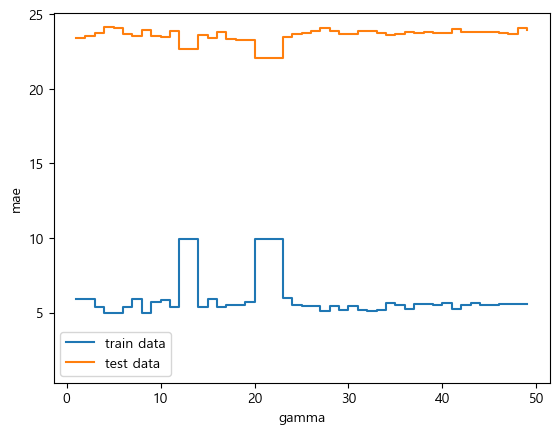

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel("gamma")
ax.set_ylabel("mae")
#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, train_scores,  label="train data", drawstyle="steps-post")
ax.plot(ccp_alpha_list, test_scores,  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post")
#ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
#plt.xlim(0,10)
plt.ylim(.30)
plt.show()
plt.close('all')

# LAMBDA에 따른 변화


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5,shuffle =True)

# 0.4 0.7, 0.8

In [8]:
from xgboost import XGBRegressor

X_train, X_eval, Y_train, Y_eval = train_test_split(X_train, Y_train, test_size=0.2, random_state=5,shuffle =True)
eval_set = [(X_eval, Y_eval)]

ccp_alpha_list = list(np.arange(0,10,0.1))
#ccp_alpha_list = [0.1,0.5,0.9]

train_scores =[]
test_scores =[]

for alpha in ccp_alpha_list:

    clf = XGBRegressor(use_label_encoder = False,
                        n_estimators = 200,
                        learning_rate = 0.02,
                        min_child_weight = 4,
                        colsample_bytree = 0.7,
                        max_depth = 8 , gamma = 2, reg_lambda = alpha)

    clf.fit(X_train,Y_train,eval_set = eval_set,early_stopping_rounds = 20)

    preds_train = clf.predict(X_train)
    preds = clf.predict(X_test)

    train_scores.append(mean_absolute_error(Y_train,preds_train))
    test_scores.append(mean_absolute_error(Y_test,preds))



[0]	validation_0-rmse:88.52020
[1]	validation_0-rmse:87.46665
[2]	validation_0-rmse:86.52385
[3]	validation_0-rmse:84.98554
[4]	validation_0-rmse:83.70222
[5]	validation_0-rmse:82.61108
[6]	validation_0-rmse:81.53636
[7]	validation_0-rmse:80.15243
[8]	validation_0-rmse:78.95504
[9]	validation_0-rmse:77.64089
[10]	validation_0-rmse:76.53785
[11]	validation_0-rmse:75.33490
[12]	validation_0-rmse:74.21742
[13]	validation_0-rmse:73.11224
[14]	validation_0-rmse:72.07111
[15]	validation_0-rmse:70.99337
[16]	validation_0-rmse:70.00435
[17]	validation_0-rmse:68.98155
[18]	validation_0-rmse:68.06975
[19]	validation_0-rmse:67.11339
[20]	validation_0-rmse:66.21478
[21]	validation_0-rmse:65.30715
[22]	validation_0-rmse:64.76765
[23]	validation_0-rmse:64.08887
[24]	validation_0-rmse:63.43969
[25]	validation_0-rmse:62.74860
[26]	validation_0-rmse:62.06003
[27]	validation_0-rmse:61.57774
[28]	validation_0-rmse:61.28665
[29]	validation_0-rmse:60.71371
[30]	validation_0-rmse:60.03721
[31]	validation_0-

[45]	validation_0-rmse:54.90237
[46]	validation_0-rmse:54.55847
[47]	validation_0-rmse:54.40758
[48]	validation_0-rmse:54.08021
[49]	validation_0-rmse:53.69443
[50]	validation_0-rmse:53.39451
[51]	validation_0-rmse:53.12787
[52]	validation_0-rmse:52.85154
[53]	validation_0-rmse:52.70409
[54]	validation_0-rmse:52.33423
[55]	validation_0-rmse:52.08811
[56]	validation_0-rmse:51.85762
[57]	validation_0-rmse:51.62608
[58]	validation_0-rmse:51.49324
[59]	validation_0-rmse:51.32792
[60]	validation_0-rmse:51.21008
[61]	validation_0-rmse:51.00607
[62]	validation_0-rmse:50.67013
[63]	validation_0-rmse:50.48804
[64]	validation_0-rmse:50.30482
[65]	validation_0-rmse:50.17747
[66]	validation_0-rmse:50.03257
[67]	validation_0-rmse:49.72772
[68]	validation_0-rmse:49.66575
[69]	validation_0-rmse:49.62254
[70]	validation_0-rmse:49.45200
[71]	validation_0-rmse:49.30997
[72]	validation_0-rmse:49.04073
[73]	validation_0-rmse:48.91898
[74]	validation_0-rmse:48.66106
[75]	validation_0-rmse:48.66000
[76]	val

[64]	validation_0-rmse:50.93746
[65]	validation_0-rmse:50.79863
[66]	validation_0-rmse:50.62877
[67]	validation_0-rmse:50.43752
[68]	validation_0-rmse:50.37371
[69]	validation_0-rmse:50.32217
[70]	validation_0-rmse:50.18467
[71]	validation_0-rmse:50.02466
[72]	validation_0-rmse:49.87103
[73]	validation_0-rmse:49.74570
[74]	validation_0-rmse:49.65245
[75]	validation_0-rmse:49.61885
[76]	validation_0-rmse:49.39237
[77]	validation_0-rmse:49.33264
[78]	validation_0-rmse:49.25376
[79]	validation_0-rmse:49.23824
[80]	validation_0-rmse:49.16505
[81]	validation_0-rmse:49.17788
[82]	validation_0-rmse:48.96530
[83]	validation_0-rmse:48.83986
[84]	validation_0-rmse:48.75295
[85]	validation_0-rmse:48.55162
[86]	validation_0-rmse:48.52420
[87]	validation_0-rmse:48.50494
[88]	validation_0-rmse:48.35204
[89]	validation_0-rmse:48.15485
[90]	validation_0-rmse:48.17368
[91]	validation_0-rmse:48.17648
[92]	validation_0-rmse:48.02909
[93]	validation_0-rmse:48.02609
[94]	validation_0-rmse:48.06248
[95]	val

[1]	validation_0-rmse:87.87517
[2]	validation_0-rmse:86.96931
[3]	validation_0-rmse:85.73000
[4]	validation_0-rmse:84.68083
[5]	validation_0-rmse:83.65874
[6]	validation_0-rmse:82.65813
[7]	validation_0-rmse:81.54286
[8]	validation_0-rmse:80.40741
[9]	validation_0-rmse:79.34798
[10]	validation_0-rmse:78.27937
[11]	validation_0-rmse:77.33401
[12]	validation_0-rmse:76.34480
[13]	validation_0-rmse:75.72063
[14]	validation_0-rmse:74.78234
[15]	validation_0-rmse:73.84522
[16]	validation_0-rmse:72.92861
[17]	validation_0-rmse:72.13256
[18]	validation_0-rmse:71.24544
[19]	validation_0-rmse:70.40602
[20]	validation_0-rmse:69.66050
[21]	validation_0-rmse:68.97691
[22]	validation_0-rmse:68.24336
[23]	validation_0-rmse:67.47223
[24]	validation_0-rmse:66.61462
[25]	validation_0-rmse:65.91746
[26]	validation_0-rmse:65.38921
[27]	validation_0-rmse:64.93172
[28]	validation_0-rmse:64.33647
[29]	validation_0-rmse:63.76104
[30]	validation_0-rmse:63.12397
[31]	validation_0-rmse:62.82357
[32]	validation_0

[134]	validation_0-rmse:48.28138
[135]	validation_0-rmse:48.25803
[0]	validation_0-rmse:88.82562
[1]	validation_0-rmse:87.86575
[2]	validation_0-rmse:86.98490
[3]	validation_0-rmse:85.91695
[4]	validation_0-rmse:84.88876
[5]	validation_0-rmse:83.89047
[6]	validation_0-rmse:82.91127
[7]	validation_0-rmse:81.85253
[8]	validation_0-rmse:80.75742
[9]	validation_0-rmse:79.82267
[10]	validation_0-rmse:79.11746
[11]	validation_0-rmse:78.08858
[12]	validation_0-rmse:77.10397
[13]	validation_0-rmse:76.13226
[14]	validation_0-rmse:75.31934
[15]	validation_0-rmse:74.40917
[16]	validation_0-rmse:73.51442
[17]	validation_0-rmse:72.74615
[18]	validation_0-rmse:72.00144
[19]	validation_0-rmse:71.23769
[20]	validation_0-rmse:70.50208
[21]	validation_0-rmse:69.68623
[22]	validation_0-rmse:68.99820
[23]	validation_0-rmse:68.22514
[24]	validation_0-rmse:67.58053
[25]	validation_0-rmse:66.73685
[26]	validation_0-rmse:66.06329
[27]	validation_0-rmse:65.55527
[28]	validation_0-rmse:65.13356
[29]	validation_

[124]	validation_0-rmse:46.09539
[125]	validation_0-rmse:45.97019
[126]	validation_0-rmse:46.02844
[127]	validation_0-rmse:45.96348
[128]	validation_0-rmse:45.93323
[129]	validation_0-rmse:45.83829
[130]	validation_0-rmse:45.84575
[131]	validation_0-rmse:45.84222
[132]	validation_0-rmse:45.85603
[133]	validation_0-rmse:45.90592
[134]	validation_0-rmse:45.83691
[135]	validation_0-rmse:45.81213
[136]	validation_0-rmse:45.74227
[137]	validation_0-rmse:45.80938
[138]	validation_0-rmse:45.76915
[139]	validation_0-rmse:45.80118
[140]	validation_0-rmse:45.74101
[141]	validation_0-rmse:45.81154
[142]	validation_0-rmse:45.82756
[143]	validation_0-rmse:45.77197
[144]	validation_0-rmse:45.80213
[145]	validation_0-rmse:45.76537
[146]	validation_0-rmse:45.74326
[147]	validation_0-rmse:45.69280
[148]	validation_0-rmse:45.65841
[149]	validation_0-rmse:45.64537
[150]	validation_0-rmse:45.59817
[151]	validation_0-rmse:45.48869
[152]	validation_0-rmse:45.45642
[153]	validation_0-rmse:45.35003
[154]	vali

[176]	validation_0-rmse:44.92720
[177]	validation_0-rmse:44.90341
[178]	validation_0-rmse:44.90168
[179]	validation_0-rmse:44.90926
[180]	validation_0-rmse:44.83715
[181]	validation_0-rmse:44.80534
[182]	validation_0-rmse:44.78085
[183]	validation_0-rmse:44.75731
[184]	validation_0-rmse:44.72515
[185]	validation_0-rmse:44.73482
[186]	validation_0-rmse:44.70332
[187]	validation_0-rmse:44.66724
[188]	validation_0-rmse:44.67289
[189]	validation_0-rmse:44.69490
[190]	validation_0-rmse:44.65424
[191]	validation_0-rmse:44.63568
[192]	validation_0-rmse:44.62222
[193]	validation_0-rmse:44.64178
[194]	validation_0-rmse:44.61731
[195]	validation_0-rmse:44.63739
[196]	validation_0-rmse:44.66553
[197]	validation_0-rmse:44.66025
[198]	validation_0-rmse:44.66730
[199]	validation_0-rmse:44.63347
[0]	validation_0-rmse:89.01205
[1]	validation_0-rmse:88.15431
[2]	validation_0-rmse:87.40527
[3]	validation_0-rmse:86.38233
[4]	validation_0-rmse:85.82219
[5]	validation_0-rmse:84.80161
[6]	validation_0-rmse:

[29]	validation_0-rmse:66.20518
[30]	validation_0-rmse:65.53740
[31]	validation_0-rmse:65.08998
[32]	validation_0-rmse:64.59730
[33]	validation_0-rmse:64.22478
[34]	validation_0-rmse:63.85110
[35]	validation_0-rmse:63.41333
[36]	validation_0-rmse:62.97547
[37]	validation_0-rmse:62.60310
[38]	validation_0-rmse:62.25147
[39]	validation_0-rmse:61.63155
[40]	validation_0-rmse:61.32832
[41]	validation_0-rmse:61.01871
[42]	validation_0-rmse:60.68425
[43]	validation_0-rmse:60.17114
[44]	validation_0-rmse:59.84909
[45]	validation_0-rmse:59.51014
[46]	validation_0-rmse:59.28894
[47]	validation_0-rmse:59.04299
[48]	validation_0-rmse:58.69857
[49]	validation_0-rmse:58.28530
[50]	validation_0-rmse:57.93699
[51]	validation_0-rmse:57.60178
[52]	validation_0-rmse:57.28522
[53]	validation_0-rmse:57.11806
[54]	validation_0-rmse:56.74551
[55]	validation_0-rmse:56.47368
[56]	validation_0-rmse:56.22823
[57]	validation_0-rmse:55.95675
[58]	validation_0-rmse:55.80818
[59]	validation_0-rmse:55.60422
[60]	val

[83]	validation_0-rmse:49.70376
[84]	validation_0-rmse:49.55335
[85]	validation_0-rmse:49.29697
[86]	validation_0-rmse:49.20765
[87]	validation_0-rmse:49.05109
[88]	validation_0-rmse:48.83921
[89]	validation_0-rmse:48.60624
[90]	validation_0-rmse:48.43562
[91]	validation_0-rmse:48.23967
[92]	validation_0-rmse:48.05324
[93]	validation_0-rmse:47.76380
[94]	validation_0-rmse:47.63014
[95]	validation_0-rmse:47.59230
[96]	validation_0-rmse:47.38802
[97]	validation_0-rmse:47.28843
[98]	validation_0-rmse:47.19854
[99]	validation_0-rmse:47.00795
[100]	validation_0-rmse:46.81991
[101]	validation_0-rmse:46.63567
[102]	validation_0-rmse:46.48681
[103]	validation_0-rmse:46.35974
[104]	validation_0-rmse:46.31406
[105]	validation_0-rmse:46.24696
[106]	validation_0-rmse:46.09112
[107]	validation_0-rmse:45.94188
[108]	validation_0-rmse:45.79599
[109]	validation_0-rmse:45.72799
[110]	validation_0-rmse:45.66723
[111]	validation_0-rmse:45.56419
[112]	validation_0-rmse:45.51234
[113]	validation_0-rmse:45.

[136]	validation_0-rmse:44.00557
[137]	validation_0-rmse:43.99305
[138]	validation_0-rmse:43.92479
[139]	validation_0-rmse:43.82475
[140]	validation_0-rmse:43.75980
[141]	validation_0-rmse:43.78472
[142]	validation_0-rmse:43.74665
[143]	validation_0-rmse:43.73109
[144]	validation_0-rmse:43.75613
[145]	validation_0-rmse:43.69081
[146]	validation_0-rmse:43.64296
[147]	validation_0-rmse:43.57814
[148]	validation_0-rmse:43.51694
[149]	validation_0-rmse:43.48846
[150]	validation_0-rmse:43.43015
[151]	validation_0-rmse:43.37136
[152]	validation_0-rmse:43.38811
[153]	validation_0-rmse:43.32275
[154]	validation_0-rmse:43.27092
[155]	validation_0-rmse:43.22950
[156]	validation_0-rmse:43.19582
[157]	validation_0-rmse:43.23552
[158]	validation_0-rmse:43.27932
[159]	validation_0-rmse:43.29832
[160]	validation_0-rmse:43.25226
[161]	validation_0-rmse:43.20291
[162]	validation_0-rmse:43.15736
[163]	validation_0-rmse:43.11214
[164]	validation_0-rmse:43.08581
[165]	validation_0-rmse:43.08870
[166]	vali

[188]	validation_0-rmse:42.73467
[189]	validation_0-rmse:42.77618
[190]	validation_0-rmse:42.71037
[191]	validation_0-rmse:42.67685
[192]	validation_0-rmse:42.65440
[193]	validation_0-rmse:42.62638
[194]	validation_0-rmse:42.61121
[195]	validation_0-rmse:42.61041
[196]	validation_0-rmse:42.64635
[197]	validation_0-rmse:42.62001
[198]	validation_0-rmse:42.64751
[199]	validation_0-rmse:42.60229
[0]	validation_0-rmse:88.92997
[1]	validation_0-rmse:87.83899
[2]	validation_0-rmse:86.73724
[3]	validation_0-rmse:85.61254
[4]	validation_0-rmse:84.96011
[5]	validation_0-rmse:84.32582
[6]	validation_0-rmse:83.55900
[7]	validation_0-rmse:82.56962
[8]	validation_0-rmse:81.57115
[9]	validation_0-rmse:80.63331
[10]	validation_0-rmse:79.84662
[11]	validation_0-rmse:78.71895
[12]	validation_0-rmse:78.08807
[13]	validation_0-rmse:77.29617
[14]	validation_0-rmse:76.28809
[15]	validation_0-rmse:75.28931
[16]	validation_0-rmse:74.36050
[17]	validation_0-rmse:73.49202
[18]	validation_0-rmse:73.07728
[19]	v

[42]	validation_0-rmse:60.09872
[43]	validation_0-rmse:59.54776
[44]	validation_0-rmse:59.31488
[45]	validation_0-rmse:58.95293
[46]	validation_0-rmse:58.66494
[47]	validation_0-rmse:58.38092
[48]	validation_0-rmse:57.97438
[49]	validation_0-rmse:57.51564
[50]	validation_0-rmse:57.17307
[51]	validation_0-rmse:56.96802
[52]	validation_0-rmse:56.60310
[53]	validation_0-rmse:56.40837
[54]	validation_0-rmse:55.99820
[55]	validation_0-rmse:55.75402
[56]	validation_0-rmse:55.47871
[57]	validation_0-rmse:55.04005
[58]	validation_0-rmse:54.86573
[59]	validation_0-rmse:54.66367
[60]	validation_0-rmse:54.55757
[61]	validation_0-rmse:54.45763
[62]	validation_0-rmse:54.06399
[63]	validation_0-rmse:53.92268
[64]	validation_0-rmse:53.62290
[65]	validation_0-rmse:53.53443
[66]	validation_0-rmse:53.35028
[67]	validation_0-rmse:52.99558
[68]	validation_0-rmse:52.74967
[69]	validation_0-rmse:52.49445
[70]	validation_0-rmse:52.10274
[71]	validation_0-rmse:51.93048
[72]	validation_0-rmse:51.56839
[73]	val

[96]	validation_0-rmse:47.05022
[97]	validation_0-rmse:46.83698
[98]	validation_0-rmse:46.76336
[99]	validation_0-rmse:46.55232
[100]	validation_0-rmse:46.37050
[101]	validation_0-rmse:46.18756
[102]	validation_0-rmse:46.00649
[103]	validation_0-rmse:45.84052
[104]	validation_0-rmse:45.77414
[105]	validation_0-rmse:45.69756
[106]	validation_0-rmse:45.51203
[107]	validation_0-rmse:45.33384
[108]	validation_0-rmse:45.18085
[109]	validation_0-rmse:45.17827
[110]	validation_0-rmse:45.00606
[111]	validation_0-rmse:44.84157
[112]	validation_0-rmse:44.79519
[113]	validation_0-rmse:44.81355
[114]	validation_0-rmse:44.65219
[115]	validation_0-rmse:44.51060
[116]	validation_0-rmse:44.37270
[117]	validation_0-rmse:44.32966
[118]	validation_0-rmse:44.19815
[119]	validation_0-rmse:44.06715
[120]	validation_0-rmse:43.92156
[121]	validation_0-rmse:43.86823
[122]	validation_0-rmse:43.72779
[123]	validation_0-rmse:43.67750
[124]	validation_0-rmse:43.65600
[125]	validation_0-rmse:43.52734
[126]	validati

[148]	validation_0-rmse:43.33749
[149]	validation_0-rmse:43.31184
[150]	validation_0-rmse:43.23534
[151]	validation_0-rmse:43.14456
[152]	validation_0-rmse:43.16907
[153]	validation_0-rmse:43.07999
[154]	validation_0-rmse:43.01347
[155]	validation_0-rmse:43.03292
[156]	validation_0-rmse:42.99735
[157]	validation_0-rmse:43.00016
[158]	validation_0-rmse:42.92506
[159]	validation_0-rmse:42.92559
[160]	validation_0-rmse:42.85804
[161]	validation_0-rmse:42.80072
[162]	validation_0-rmse:42.74246
[163]	validation_0-rmse:42.66186
[164]	validation_0-rmse:42.63834
[165]	validation_0-rmse:42.66626
[166]	validation_0-rmse:42.64092
[167]	validation_0-rmse:42.60149
[168]	validation_0-rmse:42.56286
[169]	validation_0-rmse:42.51773
[170]	validation_0-rmse:42.46004
[171]	validation_0-rmse:42.48720
[172]	validation_0-rmse:42.42052
[173]	validation_0-rmse:42.44139
[174]	validation_0-rmse:42.41885
[175]	validation_0-rmse:42.40382
[176]	validation_0-rmse:42.42666
[177]	validation_0-rmse:42.40815
[178]	vali

[0]	validation_0-rmse:88.98201
[1]	validation_0-rmse:87.99134
[2]	validation_0-rmse:87.27380
[3]	validation_0-rmse:86.32566
[4]	validation_0-rmse:85.48363
[5]	validation_0-rmse:84.52486
[6]	validation_0-rmse:83.85278
[7]	validation_0-rmse:82.87597
[8]	validation_0-rmse:81.92344
[9]	validation_0-rmse:81.02759
[10]	validation_0-rmse:80.50256
[11]	validation_0-rmse:79.88586
[12]	validation_0-rmse:79.09202
[13]	validation_0-rmse:78.26526
[14]	validation_0-rmse:77.24896
[15]	validation_0-rmse:76.34602
[16]	validation_0-rmse:75.35865
[17]	validation_0-rmse:74.54926
[18]	validation_0-rmse:74.13490
[19]	validation_0-rmse:73.64810
[20]	validation_0-rmse:73.23216
[21]	validation_0-rmse:72.47799
[22]	validation_0-rmse:71.86278
[23]	validation_0-rmse:71.04124
[24]	validation_0-rmse:70.33270
[25]	validation_0-rmse:69.54231
[26]	validation_0-rmse:68.75005
[27]	validation_0-rmse:68.31867
[28]	validation_0-rmse:67.86281
[29]	validation_0-rmse:67.46579
[30]	validation_0-rmse:66.66267
[31]	validation_0-

[54]	validation_0-rmse:57.09234
[55]	validation_0-rmse:56.89633
[56]	validation_0-rmse:56.68793
[57]	validation_0-rmse:56.44246
[58]	validation_0-rmse:56.30093
[59]	validation_0-rmse:56.11515
[60]	validation_0-rmse:55.84123
[61]	validation_0-rmse:55.67256
[62]	validation_0-rmse:55.33601
[63]	validation_0-rmse:55.20376
[64]	validation_0-rmse:54.74437
[65]	validation_0-rmse:54.59612
[66]	validation_0-rmse:54.39567
[67]	validation_0-rmse:54.05196
[68]	validation_0-rmse:53.84311
[69]	validation_0-rmse:53.77235
[70]	validation_0-rmse:53.47779
[71]	validation_0-rmse:53.30766
[72]	validation_0-rmse:52.95390
[73]	validation_0-rmse:52.54168
[74]	validation_0-rmse:52.39113
[75]	validation_0-rmse:52.00856
[76]	validation_0-rmse:51.67509
[77]	validation_0-rmse:51.61792
[78]	validation_0-rmse:51.48541
[79]	validation_0-rmse:51.34073
[80]	validation_0-rmse:51.25221
[81]	validation_0-rmse:51.17206
[82]	validation_0-rmse:50.87033
[83]	validation_0-rmse:50.67831
[84]	validation_0-rmse:50.51957
[85]	val

[107]	validation_0-rmse:47.08792
[108]	validation_0-rmse:46.93084
[109]	validation_0-rmse:46.91924
[110]	validation_0-rmse:46.74414
[111]	validation_0-rmse:46.72437
[112]	validation_0-rmse:46.64737
[113]	validation_0-rmse:46.66701
[114]	validation_0-rmse:46.50046
[115]	validation_0-rmse:46.35715
[116]	validation_0-rmse:46.25814
[117]	validation_0-rmse:46.21791
[118]	validation_0-rmse:46.08061
[119]	validation_0-rmse:45.94019
[120]	validation_0-rmse:45.80971
[121]	validation_0-rmse:45.74603
[122]	validation_0-rmse:45.60486
[123]	validation_0-rmse:45.48259
[124]	validation_0-rmse:45.46178
[125]	validation_0-rmse:45.32867
[126]	validation_0-rmse:45.19468
[127]	validation_0-rmse:45.22096
[128]	validation_0-rmse:45.09200
[129]	validation_0-rmse:44.97839
[130]	validation_0-rmse:44.94925
[131]	validation_0-rmse:44.91586
[132]	validation_0-rmse:44.92529
[133]	validation_0-rmse:44.92305
[134]	validation_0-rmse:44.82132
[135]	validation_0-rmse:44.78088
[136]	validation_0-rmse:44.77821
[137]	vali

[159]	validation_0-rmse:43.75144
[160]	validation_0-rmse:43.76009
[161]	validation_0-rmse:43.70080
[162]	validation_0-rmse:43.73531
[163]	validation_0-rmse:43.71986
[164]	validation_0-rmse:43.70982
[165]	validation_0-rmse:43.67575
[166]	validation_0-rmse:43.63565
[167]	validation_0-rmse:43.65416
[168]	validation_0-rmse:43.57305
[169]	validation_0-rmse:43.60593
[170]	validation_0-rmse:43.56074
[171]	validation_0-rmse:43.52501
[172]	validation_0-rmse:43.54092
[173]	validation_0-rmse:43.58233
[174]	validation_0-rmse:43.52200
[175]	validation_0-rmse:43.48048
[176]	validation_0-rmse:43.49869
[177]	validation_0-rmse:43.44480
[178]	validation_0-rmse:43.46972
[179]	validation_0-rmse:43.43866
[180]	validation_0-rmse:43.38318
[181]	validation_0-rmse:43.34548
[182]	validation_0-rmse:43.30960
[183]	validation_0-rmse:43.25620
[184]	validation_0-rmse:43.29212
[185]	validation_0-rmse:43.26584
[186]	validation_0-rmse:43.28380
[187]	validation_0-rmse:43.24489
[188]	validation_0-rmse:43.23619
[189]	vali

[12]	validation_0-rmse:77.66880
[13]	validation_0-rmse:77.00053
[14]	validation_0-rmse:76.03413
[15]	validation_0-rmse:75.16130
[16]	validation_0-rmse:74.26950
[17]	validation_0-rmse:73.48145
[18]	validation_0-rmse:73.05351
[19]	validation_0-rmse:72.58297
[20]	validation_0-rmse:72.24640
[21]	validation_0-rmse:71.57011
[22]	validation_0-rmse:71.02314
[23]	validation_0-rmse:70.18648
[24]	validation_0-rmse:69.49909
[25]	validation_0-rmse:68.77799
[26]	validation_0-rmse:68.00068
[27]	validation_0-rmse:67.56547
[28]	validation_0-rmse:67.29372
[29]	validation_0-rmse:66.58646
[30]	validation_0-rmse:66.07133
[31]	validation_0-rmse:65.72121
[32]	validation_0-rmse:65.37423
[33]	validation_0-rmse:64.79736
[34]	validation_0-rmse:64.39091
[35]	validation_0-rmse:64.14442
[36]	validation_0-rmse:63.72982
[37]	validation_0-rmse:63.39597
[38]	validation_0-rmse:63.06109
[39]	validation_0-rmse:62.49836
[40]	validation_0-rmse:62.17648
[41]	validation_0-rmse:61.85974
[42]	validation_0-rmse:61.56681
[43]	val

[66]	validation_0-rmse:55.46330
[67]	validation_0-rmse:55.10119
[68]	validation_0-rmse:54.91221
[69]	validation_0-rmse:54.82214
[70]	validation_0-rmse:54.52787
[71]	validation_0-rmse:54.14253
[72]	validation_0-rmse:53.81374
[73]	validation_0-rmse:53.70188
[74]	validation_0-rmse:53.54470
[75]	validation_0-rmse:53.15512
[76]	validation_0-rmse:52.84251
[77]	validation_0-rmse:52.65395
[78]	validation_0-rmse:52.50505
[79]	validation_0-rmse:52.35785
[80]	validation_0-rmse:52.25951
[81]	validation_0-rmse:52.16963
[82]	validation_0-rmse:51.89227
[83]	validation_0-rmse:51.72515
[84]	validation_0-rmse:51.56703
[85]	validation_0-rmse:51.30291
[86]	validation_0-rmse:51.19080
[87]	validation_0-rmse:50.94671
[88]	validation_0-rmse:50.69941
[89]	validation_0-rmse:50.43215
[90]	validation_0-rmse:50.36741
[91]	validation_0-rmse:50.27325
[92]	validation_0-rmse:50.04357
[93]	validation_0-rmse:49.75499
[94]	validation_0-rmse:49.72696
[95]	validation_0-rmse:49.59756
[96]	validation_0-rmse:49.35964
[97]	val

[119]	validation_0-rmse:44.56390
[120]	validation_0-rmse:44.41203
[121]	validation_0-rmse:44.33980
[122]	validation_0-rmse:44.21009
[123]	validation_0-rmse:44.06338
[124]	validation_0-rmse:44.03863
[125]	validation_0-rmse:43.90052
[126]	validation_0-rmse:43.77737
[127]	validation_0-rmse:43.80326
[128]	validation_0-rmse:43.68212
[129]	validation_0-rmse:43.56435
[130]	validation_0-rmse:43.36446
[131]	validation_0-rmse:43.32712
[132]	validation_0-rmse:43.34212
[133]	validation_0-rmse:43.34816
[134]	validation_0-rmse:43.25145
[135]	validation_0-rmse:43.20412
[136]	validation_0-rmse:43.20782
[137]	validation_0-rmse:43.09609
[138]	validation_0-rmse:43.10995
[139]	validation_0-rmse:43.02297
[140]	validation_0-rmse:42.98852
[141]	validation_0-rmse:42.94263
[142]	validation_0-rmse:42.95193
[143]	validation_0-rmse:42.91877
[144]	validation_0-rmse:42.93372
[145]	validation_0-rmse:42.94055
[146]	validation_0-rmse:42.85251
[147]	validation_0-rmse:42.85636
[148]	validation_0-rmse:42.82740
[149]	vali

[171]	validation_0-rmse:43.28735
[172]	validation_0-rmse:43.30139
[173]	validation_0-rmse:43.35006
[174]	validation_0-rmse:43.33507
[175]	validation_0-rmse:43.27415
[176]	validation_0-rmse:43.29393
[177]	validation_0-rmse:43.23508
[178]	validation_0-rmse:43.26311
[179]	validation_0-rmse:43.21437
[180]	validation_0-rmse:43.15726
[181]	validation_0-rmse:43.10251
[182]	validation_0-rmse:43.09005
[183]	validation_0-rmse:43.03589
[184]	validation_0-rmse:43.06329
[185]	validation_0-rmse:43.01318
[186]	validation_0-rmse:42.96731
[187]	validation_0-rmse:42.97831
[188]	validation_0-rmse:42.93766
[189]	validation_0-rmse:42.88484
[190]	validation_0-rmse:42.90669
[191]	validation_0-rmse:42.85847
[192]	validation_0-rmse:42.80319
[193]	validation_0-rmse:42.75463
[194]	validation_0-rmse:42.67928
[195]	validation_0-rmse:42.69927
[196]	validation_0-rmse:42.65078
[197]	validation_0-rmse:42.67852
[198]	validation_0-rmse:42.63176
[199]	validation_0-rmse:42.56287
[0]	validation_0-rmse:89.09949
[1]	validati

[24]	validation_0-rmse:70.57673
[25]	validation_0-rmse:69.87026
[26]	validation_0-rmse:69.16670
[27]	validation_0-rmse:68.74767
[28]	validation_0-rmse:68.48889
[29]	validation_0-rmse:67.78328
[30]	validation_0-rmse:67.08559
[31]	validation_0-rmse:66.59130
[32]	validation_0-rmse:66.37010
[33]	validation_0-rmse:65.80260
[34]	validation_0-rmse:65.49339
[35]	validation_0-rmse:65.15259
[36]	validation_0-rmse:64.61395
[37]	validation_0-rmse:64.13216
[38]	validation_0-rmse:63.65626
[39]	validation_0-rmse:63.17525
[40]	validation_0-rmse:62.82716
[41]	validation_0-rmse:62.51319
[42]	validation_0-rmse:62.23164
[43]	validation_0-rmse:61.76115
[44]	validation_0-rmse:61.17605
[45]	validation_0-rmse:60.77220
[46]	validation_0-rmse:60.50266
[47]	validation_0-rmse:60.25428
[48]	validation_0-rmse:59.89397
[49]	validation_0-rmse:59.43696
[50]	validation_0-rmse:59.13618
[51]	validation_0-rmse:58.56433
[52]	validation_0-rmse:58.34909
[53]	validation_0-rmse:57.84457
[54]	validation_0-rmse:57.44844
[55]	val

[78]	validation_0-rmse:51.43016
[79]	validation_0-rmse:51.27185
[80]	validation_0-rmse:51.09136
[81]	validation_0-rmse:50.86701
[82]	validation_0-rmse:50.57999
[83]	validation_0-rmse:50.41312
[84]	validation_0-rmse:50.31430
[85]	validation_0-rmse:50.03914
[86]	validation_0-rmse:49.94966
[87]	validation_0-rmse:49.85889
[88]	validation_0-rmse:49.62399
[89]	validation_0-rmse:49.37074
[90]	validation_0-rmse:49.21626
[91]	validation_0-rmse:49.13204
[92]	validation_0-rmse:48.91446
[93]	validation_0-rmse:48.61026
[94]	validation_0-rmse:48.44606
[95]	validation_0-rmse:48.34098
[96]	validation_0-rmse:48.14275
[97]	validation_0-rmse:48.02177
[98]	validation_0-rmse:47.92773
[99]	validation_0-rmse:47.71242
[100]	validation_0-rmse:47.53255
[101]	validation_0-rmse:47.47667
[102]	validation_0-rmse:47.29307
[103]	validation_0-rmse:47.16597
[104]	validation_0-rmse:47.10876
[105]	validation_0-rmse:47.00828
[106]	validation_0-rmse:46.82290
[107]	validation_0-rmse:46.71915
[108]	validation_0-rmse:46.56172

[131]	validation_0-rmse:43.51469
[132]	validation_0-rmse:43.52958
[133]	validation_0-rmse:43.52797
[134]	validation_0-rmse:43.41685
[135]	validation_0-rmse:43.35272
[136]	validation_0-rmse:43.30446
[137]	validation_0-rmse:43.19115
[138]	validation_0-rmse:43.16482
[139]	validation_0-rmse:43.07880
[140]	validation_0-rmse:43.04117
[141]	validation_0-rmse:43.05103
[142]	validation_0-rmse:43.05933
[143]	validation_0-rmse:43.02164
[144]	validation_0-rmse:43.02041
[145]	validation_0-rmse:43.02529
[146]	validation_0-rmse:42.93280
[147]	validation_0-rmse:42.94014
[148]	validation_0-rmse:42.90937
[149]	validation_0-rmse:42.96012
[150]	validation_0-rmse:42.94957
[151]	validation_0-rmse:42.86337
[152]	validation_0-rmse:42.86053
[153]	validation_0-rmse:42.82586
[154]	validation_0-rmse:42.72929
[155]	validation_0-rmse:42.71819
[156]	validation_0-rmse:42.69396
[157]	validation_0-rmse:42.68453
[158]	validation_0-rmse:42.59395
[159]	validation_0-rmse:42.55481
[160]	validation_0-rmse:42.56609
[161]	vali

[183]	validation_0-rmse:40.98993
[184]	validation_0-rmse:40.99448
[185]	validation_0-rmse:40.96397
[186]	validation_0-rmse:40.93134
[187]	validation_0-rmse:40.94307
[188]	validation_0-rmse:40.86286
[189]	validation_0-rmse:40.82934
[190]	validation_0-rmse:40.79583
[191]	validation_0-rmse:40.80097
[192]	validation_0-rmse:40.80888
[193]	validation_0-rmse:40.75659
[194]	validation_0-rmse:40.70139
[195]	validation_0-rmse:40.64883
[196]	validation_0-rmse:40.65889
[197]	validation_0-rmse:40.68526
[198]	validation_0-rmse:40.68465
[199]	validation_0-rmse:40.69792
[0]	validation_0-rmse:89.13891
[1]	validation_0-rmse:88.15705
[2]	validation_0-rmse:87.01035
[3]	validation_0-rmse:86.08482
[4]	validation_0-rmse:85.08688
[5]	validation_0-rmse:84.19750
[6]	validation_0-rmse:83.32900
[7]	validation_0-rmse:82.45441
[8]	validation_0-rmse:81.42062
[9]	validation_0-rmse:80.58797
[10]	validation_0-rmse:79.72665
[11]	validation_0-rmse:78.95329
[12]	validation_0-rmse:78.10090
[13]	validation_0-rmse:77.33375
[

[36]	validation_0-rmse:65.31361
[37]	validation_0-rmse:64.88036
[38]	validation_0-rmse:64.38727
[39]	validation_0-rmse:63.75863
[40]	validation_0-rmse:63.34316
[41]	validation_0-rmse:62.86877
[42]	validation_0-rmse:62.38785
[43]	validation_0-rmse:61.99223
[44]	validation_0-rmse:61.41546
[45]	validation_0-rmse:60.84887
[46]	validation_0-rmse:60.57225
[47]	validation_0-rmse:60.30885
[48]	validation_0-rmse:60.06608
[49]	validation_0-rmse:59.59607
[50]	validation_0-rmse:59.18424
[51]	validation_0-rmse:58.94523
[52]	validation_0-rmse:58.47442
[53]	validation_0-rmse:57.93777
[54]	validation_0-rmse:57.51656
[55]	validation_0-rmse:57.30616
[56]	validation_0-rmse:56.78174
[57]	validation_0-rmse:56.27447
[58]	validation_0-rmse:56.08277
[59]	validation_0-rmse:55.57903
[60]	validation_0-rmse:55.11444
[61]	validation_0-rmse:54.93960
[62]	validation_0-rmse:54.73632
[63]	validation_0-rmse:54.28215
[64]	validation_0-rmse:53.85256
[65]	validation_0-rmse:53.71205
[66]	validation_0-rmse:53.50030
[67]	val

[90]	validation_0-rmse:49.10548
[91]	validation_0-rmse:49.01642
[92]	validation_0-rmse:48.78679
[93]	validation_0-rmse:48.47382
[94]	validation_0-rmse:48.44566
[95]	validation_0-rmse:48.33561
[96]	validation_0-rmse:48.12162
[97]	validation_0-rmse:47.90286
[98]	validation_0-rmse:47.77780
[99]	validation_0-rmse:47.55917
[100]	validation_0-rmse:47.35012
[101]	validation_0-rmse:47.22033
[102]	validation_0-rmse:47.02802
[103]	validation_0-rmse:46.84805
[104]	validation_0-rmse:46.77255
[105]	validation_0-rmse:46.57879
[106]	validation_0-rmse:46.37958
[107]	validation_0-rmse:46.27417
[108]	validation_0-rmse:46.08539
[109]	validation_0-rmse:45.84917
[110]	validation_0-rmse:45.66252
[111]	validation_0-rmse:45.57741
[112]	validation_0-rmse:45.47715
[113]	validation_0-rmse:45.46314
[114]	validation_0-rmse:45.29230
[115]	validation_0-rmse:45.12158
[116]	validation_0-rmse:44.99195
[117]	validation_0-rmse:44.95038
[118]	validation_0-rmse:44.78868
[119]	validation_0-rmse:44.64357
[120]	validation_0-r

[142]	validation_0-rmse:42.95142
[143]	validation_0-rmse:42.92999
[144]	validation_0-rmse:42.93671
[145]	validation_0-rmse:42.93978
[146]	validation_0-rmse:42.84219
[147]	validation_0-rmse:42.85131
[148]	validation_0-rmse:42.81394
[149]	validation_0-rmse:42.75776
[150]	validation_0-rmse:42.73649
[151]	validation_0-rmse:42.70094
[152]	validation_0-rmse:42.70938
[153]	validation_0-rmse:42.69447
[154]	validation_0-rmse:42.59063
[155]	validation_0-rmse:42.58573
[156]	validation_0-rmse:42.55157
[157]	validation_0-rmse:42.55380
[158]	validation_0-rmse:42.51387
[159]	validation_0-rmse:42.47588
[160]	validation_0-rmse:42.46504
[161]	validation_0-rmse:42.43494
[162]	validation_0-rmse:42.43670
[163]	validation_0-rmse:42.40903
[164]	validation_0-rmse:42.31892
[165]	validation_0-rmse:42.30862
[166]	validation_0-rmse:42.30872
[167]	validation_0-rmse:42.29525
[168]	validation_0-rmse:42.30835
[169]	validation_0-rmse:42.31496
[170]	validation_0-rmse:42.32415
[171]	validation_0-rmse:42.33566
[172]	vali

[194]	validation_0-rmse:41.80326
[195]	validation_0-rmse:41.79181
[196]	validation_0-rmse:41.76699
[197]	validation_0-rmse:41.78498
[198]	validation_0-rmse:41.72675
[199]	validation_0-rmse:41.64996
[0]	validation_0-rmse:88.99084
[1]	validation_0-rmse:87.89499
[2]	validation_0-rmse:86.98225
[3]	validation_0-rmse:86.09154
[4]	validation_0-rmse:85.08015
[5]	validation_0-rmse:84.20792
[6]	validation_0-rmse:83.35667
[7]	validation_0-rmse:82.41096
[8]	validation_0-rmse:81.51112
[9]	validation_0-rmse:80.61208
[10]	validation_0-rmse:79.84656
[11]	validation_0-rmse:79.09802
[12]	validation_0-rmse:78.31616
[13]	validation_0-rmse:77.49330
[14]	validation_0-rmse:76.82729
[15]	validation_0-rmse:76.07395
[16]	validation_0-rmse:75.41173
[17]	validation_0-rmse:74.67186
[18]	validation_0-rmse:74.07462
[19]	validation_0-rmse:73.39155
[20]	validation_0-rmse:72.87183
[21]	validation_0-rmse:72.28816
[22]	validation_0-rmse:71.61805
[23]	validation_0-rmse:70.91544
[24]	validation_0-rmse:70.29857
[25]	validat

[48]	validation_0-rmse:59.77268
[49]	validation_0-rmse:59.23774
[50]	validation_0-rmse:58.92229
[51]	validation_0-rmse:58.70132
[52]	validation_0-rmse:58.39793
[53]	validation_0-rmse:58.21281
[54]	validation_0-rmse:57.80977
[55]	validation_0-rmse:57.61819
[56]	validation_0-rmse:57.36713
[57]	validation_0-rmse:56.87056
[58]	validation_0-rmse:56.63685
[59]	validation_0-rmse:56.37461
[60]	validation_0-rmse:56.07849
[61]	validation_0-rmse:55.87420
[62]	validation_0-rmse:55.67279
[63]	validation_0-rmse:55.45354
[64]	validation_0-rmse:54.98421
[65]	validation_0-rmse:54.79556
[66]	validation_0-rmse:54.57409
[67]	validation_0-rmse:54.37861
[68]	validation_0-rmse:54.05141
[69]	validation_0-rmse:53.87621
[70]	validation_0-rmse:53.42016
[71]	validation_0-rmse:53.09556
[72]	validation_0-rmse:52.79407
[73]	validation_0-rmse:52.63484
[74]	validation_0-rmse:52.33955
[75]	validation_0-rmse:52.18722
[76]	validation_0-rmse:51.90871
[77]	validation_0-rmse:51.76313
[78]	validation_0-rmse:51.49205
[79]	val

[102]	validation_0-rmse:46.31459
[103]	validation_0-rmse:46.19854
[104]	validation_0-rmse:46.13011
[105]	validation_0-rmse:46.01969
[106]	validation_0-rmse:45.83218
[107]	validation_0-rmse:45.74798
[108]	validation_0-rmse:45.56440
[109]	validation_0-rmse:45.55638
[110]	validation_0-rmse:45.37978
[111]	validation_0-rmse:45.28857
[112]	validation_0-rmse:45.20098
[113]	validation_0-rmse:45.09386
[114]	validation_0-rmse:44.91229
[115]	validation_0-rmse:44.73755
[116]	validation_0-rmse:44.66473
[117]	validation_0-rmse:44.58263
[118]	validation_0-rmse:44.41085
[119]	validation_0-rmse:44.38395
[120]	validation_0-rmse:44.22007
[121]	validation_0-rmse:44.05980
[122]	validation_0-rmse:43.89977
[123]	validation_0-rmse:43.74910
[124]	validation_0-rmse:43.71582
[125]	validation_0-rmse:43.56794
[126]	validation_0-rmse:43.42121
[127]	validation_0-rmse:43.41156
[128]	validation_0-rmse:43.27231
[129]	validation_0-rmse:43.13543
[130]	validation_0-rmse:43.00956
[131]	validation_0-rmse:42.94059
[132]	vali

[154]	validation_0-rmse:41.40956
[155]	validation_0-rmse:41.40806
[156]	validation_0-rmse:41.37315
[157]	validation_0-rmse:41.36868
[158]	validation_0-rmse:41.27043
[159]	validation_0-rmse:41.20438
[160]	validation_0-rmse:41.21072
[161]	validation_0-rmse:41.18349
[162]	validation_0-rmse:41.19255
[163]	validation_0-rmse:41.16491
[164]	validation_0-rmse:41.12781
[165]	validation_0-rmse:41.11485
[166]	validation_0-rmse:41.12443
[167]	validation_0-rmse:41.12774
[168]	validation_0-rmse:41.12283
[169]	validation_0-rmse:41.12403
[170]	validation_0-rmse:41.13248
[171]	validation_0-rmse:41.14179
[172]	validation_0-rmse:41.14551
[173]	validation_0-rmse:41.15504
[174]	validation_0-rmse:41.12689
[175]	validation_0-rmse:41.05676
[176]	validation_0-rmse:41.06221
[177]	validation_0-rmse:41.04388
[178]	validation_0-rmse:41.06249
[179]	validation_0-rmse:41.06044
[180]	validation_0-rmse:41.04115
[181]	validation_0-rmse:40.99415
[182]	validation_0-rmse:40.96271
[183]	validation_0-rmse:40.89659
[184]	vali

[6]	validation_0-rmse:83.08797
[7]	validation_0-rmse:82.16835
[8]	validation_0-rmse:81.33939
[9]	validation_0-rmse:80.46131
[10]	validation_0-rmse:79.71936
[11]	validation_0-rmse:78.99129
[12]	validation_0-rmse:78.22587
[13]	validation_0-rmse:77.42194
[14]	validation_0-rmse:76.77305
[15]	validation_0-rmse:76.07533
[16]	validation_0-rmse:75.36166
[17]	validation_0-rmse:74.73425
[18]	validation_0-rmse:74.15311
[19]	validation_0-rmse:73.44411
[20]	validation_0-rmse:73.02457
[21]	validation_0-rmse:72.49571
[22]	validation_0-rmse:71.93988
[23]	validation_0-rmse:71.27444
[24]	validation_0-rmse:70.73881
[25]	validation_0-rmse:70.12166
[26]	validation_0-rmse:69.45534
[27]	validation_0-rmse:68.95297
[28]	validation_0-rmse:68.34158
[29]	validation_0-rmse:67.87251
[30]	validation_0-rmse:67.39951
[31]	validation_0-rmse:66.92484
[32]	validation_0-rmse:66.72540
[33]	validation_0-rmse:66.37658
[34]	validation_0-rmse:65.93691
[35]	validation_0-rmse:65.66639
[36]	validation_0-rmse:65.05850
[37]	validat

[60]	validation_0-rmse:55.42978
[61]	validation_0-rmse:55.27233
[62]	validation_0-rmse:55.00937
[63]	validation_0-rmse:54.79494
[64]	validation_0-rmse:54.35749
[65]	validation_0-rmse:54.17688
[66]	validation_0-rmse:53.98835
[67]	validation_0-rmse:53.79525
[68]	validation_0-rmse:53.47798
[69]	validation_0-rmse:53.30454
[70]	validation_0-rmse:53.02381
[71]	validation_0-rmse:52.70862
[72]	validation_0-rmse:52.40786
[73]	validation_0-rmse:52.23998
[74]	validation_0-rmse:51.94920
[75]	validation_0-rmse:51.79563
[76]	validation_0-rmse:51.52296
[77]	validation_0-rmse:51.43213
[78]	validation_0-rmse:51.17234
[79]	validation_0-rmse:51.09248
[80]	validation_0-rmse:51.00849
[81]	validation_0-rmse:50.77478
[82]	validation_0-rmse:50.52258
[83]	validation_0-rmse:50.39010
[84]	validation_0-rmse:50.25284
[85]	validation_0-rmse:50.01146
[86]	validation_0-rmse:49.89343
[87]	validation_0-rmse:49.63149
[88]	validation_0-rmse:49.40192
[89]	validation_0-rmse:49.17791
[90]	validation_0-rmse:49.10198
[91]	val

[113]	validation_0-rmse:45.82513
[114]	validation_0-rmse:45.65414
[115]	validation_0-rmse:45.48919
[116]	validation_0-rmse:45.40286
[117]	validation_0-rmse:45.31353
[118]	validation_0-rmse:45.15287
[119]	validation_0-rmse:45.09329
[120]	validation_0-rmse:44.93919
[121]	validation_0-rmse:44.84658
[122]	validation_0-rmse:44.69594
[123]	validation_0-rmse:44.54592
[124]	validation_0-rmse:44.51910
[125]	validation_0-rmse:44.37709
[126]	validation_0-rmse:44.23683
[127]	validation_0-rmse:44.20492
[128]	validation_0-rmse:44.06347
[129]	validation_0-rmse:43.92890
[130]	validation_0-rmse:43.80754
[131]	validation_0-rmse:43.74976
[132]	validation_0-rmse:43.74880
[133]	validation_0-rmse:43.72653
[134]	validation_0-rmse:43.60366
[135]	validation_0-rmse:43.53014
[136]	validation_0-rmse:43.48086
[137]	validation_0-rmse:43.41756
[138]	validation_0-rmse:43.36448
[139]	validation_0-rmse:43.30243
[140]	validation_0-rmse:43.25360
[141]	validation_0-rmse:43.20138
[142]	validation_0-rmse:43.21151
[143]	vali

[165]	validation_0-rmse:42.57390
[166]	validation_0-rmse:42.58418
[167]	validation_0-rmse:42.56844
[168]	validation_0-rmse:42.58372
[169]	validation_0-rmse:42.59539
[170]	validation_0-rmse:42.59750
[171]	validation_0-rmse:42.61266
[172]	validation_0-rmse:42.61010
[173]	validation_0-rmse:42.61150
[174]	validation_0-rmse:42.59163
[175]	validation_0-rmse:42.52423
[176]	validation_0-rmse:42.52845
[177]	validation_0-rmse:42.51100
[178]	validation_0-rmse:42.52483
[179]	validation_0-rmse:42.53675
[180]	validation_0-rmse:42.52493
[181]	validation_0-rmse:42.46014
[182]	validation_0-rmse:42.44575
[183]	validation_0-rmse:42.38163
[184]	validation_0-rmse:42.38296
[185]	validation_0-rmse:42.40872
[186]	validation_0-rmse:42.42716
[187]	validation_0-rmse:42.44467
[188]	validation_0-rmse:42.43127
[189]	validation_0-rmse:42.37095
[190]	validation_0-rmse:42.35706
[191]	validation_0-rmse:42.34616
[192]	validation_0-rmse:42.33607
[193]	validation_0-rmse:42.34321
[194]	validation_0-rmse:42.28576
[195]	vali

[18]	validation_0-rmse:74.20448
[19]	validation_0-rmse:73.55984
[20]	validation_0-rmse:72.87622
[21]	validation_0-rmse:72.23299
[22]	validation_0-rmse:71.69247
[23]	validation_0-rmse:71.07330
[24]	validation_0-rmse:70.60076
[25]	validation_0-rmse:70.01170
[26]	validation_0-rmse:69.72940
[27]	validation_0-rmse:69.25350
[28]	validation_0-rmse:68.68787
[29]	validation_0-rmse:68.22942
[30]	validation_0-rmse:67.76920
[31]	validation_0-rmse:67.53377
[32]	validation_0-rmse:67.27357
[33]	validation_0-rmse:66.83498
[34]	validation_0-rmse:66.29169
[35]	validation_0-rmse:65.66608
[36]	validation_0-rmse:65.28240
[37]	validation_0-rmse:64.81463
[38]	validation_0-rmse:64.35145
[39]	validation_0-rmse:63.93720
[40]	validation_0-rmse:63.56830
[41]	validation_0-rmse:63.12286
[42]	validation_0-rmse:62.70698
[43]	validation_0-rmse:62.37656
[44]	validation_0-rmse:61.87743
[45]	validation_0-rmse:61.33625
[46]	validation_0-rmse:61.01146
[47]	validation_0-rmse:60.66493
[48]	validation_0-rmse:60.45288
[49]	val

[72]	validation_0-rmse:52.27239
[73]	validation_0-rmse:52.13782
[74]	validation_0-rmse:51.85630
[75]	validation_0-rmse:51.70616
[76]	validation_0-rmse:51.44020
[77]	validation_0-rmse:51.31129
[78]	validation_0-rmse:51.04751
[79]	validation_0-rmse:50.92487
[80]	validation_0-rmse:50.80175
[81]	validation_0-rmse:50.56959
[82]	validation_0-rmse:50.39718
[83]	validation_0-rmse:50.28380
[84]	validation_0-rmse:50.17283
[85]	validation_0-rmse:50.14947
[86]	validation_0-rmse:50.04821
[87]	validation_0-rmse:49.82499
[88]	validation_0-rmse:49.61685
[89]	validation_0-rmse:49.40762
[90]	validation_0-rmse:49.32674
[91]	validation_0-rmse:49.18928
[92]	validation_0-rmse:49.08627
[93]	validation_0-rmse:48.82708
[94]	validation_0-rmse:48.71808
[95]	validation_0-rmse:48.59930
[96]	validation_0-rmse:48.36612
[97]	validation_0-rmse:48.25871
[98]	validation_0-rmse:48.13822
[99]	validation_0-rmse:48.04085
[100]	validation_0-rmse:47.94294
[101]	validation_0-rmse:47.80976
[102]	validation_0-rmse:47.62999
[103]

[125]	validation_0-rmse:44.48552
[126]	validation_0-rmse:44.34003
[127]	validation_0-rmse:44.28576
[128]	validation_0-rmse:44.14417
[129]	validation_0-rmse:44.00463
[130]	validation_0-rmse:43.91984
[131]	validation_0-rmse:43.84287
[132]	validation_0-rmse:43.82819
[133]	validation_0-rmse:43.79762
[134]	validation_0-rmse:43.66833
[135]	validation_0-rmse:43.59130
[136]	validation_0-rmse:43.47721
[137]	validation_0-rmse:43.40571
[138]	validation_0-rmse:43.32751
[139]	validation_0-rmse:43.32769
[140]	validation_0-rmse:43.26133
[141]	validation_0-rmse:43.19951
[142]	validation_0-rmse:43.19791
[143]	validation_0-rmse:43.13720
[144]	validation_0-rmse:43.12600
[145]	validation_0-rmse:43.08113
[146]	validation_0-rmse:42.97187
[147]	validation_0-rmse:42.92744
[148]	validation_0-rmse:42.83173
[149]	validation_0-rmse:42.85012
[150]	validation_0-rmse:42.83257
[151]	validation_0-rmse:42.72871
[152]	validation_0-rmse:42.68787
[153]	validation_0-rmse:42.68480
[154]	validation_0-rmse:42.63304
[155]	vali

[177]	validation_0-rmse:42.52326
[178]	validation_0-rmse:42.53263
[179]	validation_0-rmse:42.52660
[180]	validation_0-rmse:42.46358
[181]	validation_0-rmse:42.39712
[182]	validation_0-rmse:42.38213
[183]	validation_0-rmse:42.31982
[184]	validation_0-rmse:42.31764
[185]	validation_0-rmse:42.32460
[186]	validation_0-rmse:42.31913
[187]	validation_0-rmse:42.31359
[188]	validation_0-rmse:42.31987
[189]	validation_0-rmse:42.26575
[190]	validation_0-rmse:42.20516
[191]	validation_0-rmse:42.19410
[192]	validation_0-rmse:42.13708
[193]	validation_0-rmse:42.09943
[194]	validation_0-rmse:42.04207
[195]	validation_0-rmse:42.02032
[196]	validation_0-rmse:42.00877
[197]	validation_0-rmse:42.00994
[198]	validation_0-rmse:41.95988
[199]	validation_0-rmse:41.95616
[0]	validation_0-rmse:88.95260
[1]	validation_0-rmse:87.85219
[2]	validation_0-rmse:86.82846
[3]	validation_0-rmse:85.83392
[4]	validation_0-rmse:84.86809
[5]	validation_0-rmse:83.82665
[6]	validation_0-rmse:82.91822
[7]	validation_0-rmse:82

[30]	validation_0-rmse:67.68001
[31]	validation_0-rmse:67.18187
[32]	validation_0-rmse:66.76738
[33]	validation_0-rmse:66.33505
[34]	validation_0-rmse:66.13524
[35]	validation_0-rmse:65.52093
[36]	validation_0-rmse:65.08122
[37]	validation_0-rmse:64.62430
[38]	validation_0-rmse:64.36778
[39]	validation_0-rmse:63.95531
[40]	validation_0-rmse:63.56299
[41]	validation_0-rmse:63.23256
[42]	validation_0-rmse:62.82341
[43]	validation_0-rmse:62.49112
[44]	validation_0-rmse:62.00213
[45]	validation_0-rmse:61.60044
[46]	validation_0-rmse:61.29375
[47]	validation_0-rmse:60.91643
[48]	validation_0-rmse:60.62265
[49]	validation_0-rmse:60.10408
[50]	validation_0-rmse:59.91213
[51]	validation_0-rmse:59.59647
[52]	validation_0-rmse:59.32500
[53]	validation_0-rmse:58.83925
[54]	validation_0-rmse:58.36307
[55]	validation_0-rmse:58.07567
[56]	validation_0-rmse:57.76176
[57]	validation_0-rmse:57.46605
[58]	validation_0-rmse:57.17671
[59]	validation_0-rmse:56.78324
[60]	validation_0-rmse:56.68015
[61]	val

[84]	validation_0-rmse:51.80186
[85]	validation_0-rmse:51.78177
[86]	validation_0-rmse:51.67979
[87]	validation_0-rmse:51.44427
[88]	validation_0-rmse:51.14289
[89]	validation_0-rmse:50.92384
[90]	validation_0-rmse:50.89917
[91]	validation_0-rmse:50.63636
[92]	validation_0-rmse:50.53705
[93]	validation_0-rmse:50.27388
[94]	validation_0-rmse:50.18838
[95]	validation_0-rmse:50.10469
[96]	validation_0-rmse:49.89817
[97]	validation_0-rmse:49.79671
[98]	validation_0-rmse:49.70079
[99]	validation_0-rmse:49.61895
[100]	validation_0-rmse:49.52680
[101]	validation_0-rmse:49.38437
[102]	validation_0-rmse:49.19477
[103]	validation_0-rmse:49.01842
[104]	validation_0-rmse:48.95230
[105]	validation_0-rmse:48.78793
[106]	validation_0-rmse:48.63928
[107]	validation_0-rmse:48.57620
[108]	validation_0-rmse:48.42508
[109]	validation_0-rmse:48.33698
[110]	validation_0-rmse:48.27266
[111]	validation_0-rmse:48.21376
[112]	validation_0-rmse:48.04076
[113]	validation_0-rmse:47.98315
[114]	validation_0-rmse:47

[137]	validation_0-rmse:44.26525
[138]	validation_0-rmse:44.19185
[139]	validation_0-rmse:44.19362
[140]	validation_0-rmse:44.15585
[141]	validation_0-rmse:44.14148
[142]	validation_0-rmse:44.14605
[143]	validation_0-rmse:44.05618
[144]	validation_0-rmse:43.97687
[145]	validation_0-rmse:43.97525
[146]	validation_0-rmse:43.86692
[147]	validation_0-rmse:43.82477
[148]	validation_0-rmse:43.71492
[149]	validation_0-rmse:43.72649
[150]	validation_0-rmse:43.71402
[151]	validation_0-rmse:43.61222
[152]	validation_0-rmse:43.56493
[153]	validation_0-rmse:43.55656
[154]	validation_0-rmse:43.51942
[155]	validation_0-rmse:43.48548
[156]	validation_0-rmse:43.40640
[157]	validation_0-rmse:43.36964
[158]	validation_0-rmse:43.33369
[159]	validation_0-rmse:43.27758
[160]	validation_0-rmse:43.27126
[161]	validation_0-rmse:43.18997
[162]	validation_0-rmse:43.19125
[163]	validation_0-rmse:43.10875
[164]	validation_0-rmse:43.08122
[165]	validation_0-rmse:43.08275
[166]	validation_0-rmse:43.08836
[167]	vali

[189]	validation_0-rmse:43.90820
[190]	validation_0-rmse:43.84975
[191]	validation_0-rmse:43.84610
[192]	validation_0-rmse:43.79734
[193]	validation_0-rmse:43.76518
[194]	validation_0-rmse:43.71746
[195]	validation_0-rmse:43.70933
[196]	validation_0-rmse:43.65906
[197]	validation_0-rmse:43.66692
[198]	validation_0-rmse:43.66160
[199]	validation_0-rmse:43.65760
[0]	validation_0-rmse:88.91377
[1]	validation_0-rmse:87.83329
[2]	validation_0-rmse:86.90333
[3]	validation_0-rmse:85.92364
[4]	validation_0-rmse:84.92667
[5]	validation_0-rmse:83.85054
[6]	validation_0-rmse:82.79044
[7]	validation_0-rmse:81.91806
[8]	validation_0-rmse:81.05550
[9]	validation_0-rmse:80.23398
[10]	validation_0-rmse:79.36136
[11]	validation_0-rmse:78.46200
[12]	validation_0-rmse:77.75757
[13]	validation_0-rmse:76.92600
[14]	validation_0-rmse:76.28854
[15]	validation_0-rmse:75.56448
[16]	validation_0-rmse:74.95681
[17]	validation_0-rmse:74.19079
[18]	validation_0-rmse:73.65286
[19]	validation_0-rmse:73.04170
[20]	va

[43]	validation_0-rmse:63.12145
[44]	validation_0-rmse:62.78472
[45]	validation_0-rmse:62.38808
[46]	validation_0-rmse:62.09199
[47]	validation_0-rmse:61.72648
[48]	validation_0-rmse:61.53322
[49]	validation_0-rmse:61.22792
[50]	validation_0-rmse:60.87889
[51]	validation_0-rmse:60.56137
[52]	validation_0-rmse:60.37159
[53]	validation_0-rmse:59.96964
[54]	validation_0-rmse:59.72033
[55]	validation_0-rmse:59.43701
[56]	validation_0-rmse:59.13092
[57]	validation_0-rmse:58.88578
[58]	validation_0-rmse:58.58837
[59]	validation_0-rmse:58.34514
[60]	validation_0-rmse:58.04319
[61]	validation_0-rmse:57.55774
[62]	validation_0-rmse:57.31588
[63]	validation_0-rmse:57.06967
[64]	validation_0-rmse:56.71601
[65]	validation_0-rmse:56.27644
[66]	validation_0-rmse:55.90957
[67]	validation_0-rmse:55.56775
[68]	validation_0-rmse:55.13267
[69]	validation_0-rmse:55.02968
[70]	validation_0-rmse:54.80468
[71]	validation_0-rmse:54.45127
[72]	validation_0-rmse:54.21888
[73]	validation_0-rmse:53.98571
[74]	val

[97]	validation_0-rmse:48.19659
[98]	validation_0-rmse:48.10855
[99]	validation_0-rmse:48.02763
[100]	validation_0-rmse:47.77378
[101]	validation_0-rmse:47.75789
[102]	validation_0-rmse:47.59227
[103]	validation_0-rmse:47.42857
[104]	validation_0-rmse:47.38085
[105]	validation_0-rmse:47.21983
[106]	validation_0-rmse:47.06439
[107]	validation_0-rmse:47.01894
[108]	validation_0-rmse:46.88299
[109]	validation_0-rmse:46.79504
[110]	validation_0-rmse:46.73308
[111]	validation_0-rmse:46.67304
[112]	validation_0-rmse:46.52976
[113]	validation_0-rmse:46.44692
[114]	validation_0-rmse:46.38775
[115]	validation_0-rmse:46.32379
[116]	validation_0-rmse:46.16476
[117]	validation_0-rmse:46.11312
[118]	validation_0-rmse:45.97267
[119]	validation_0-rmse:45.90741
[120]	validation_0-rmse:45.74198
[121]	validation_0-rmse:45.60691
[122]	validation_0-rmse:45.48041
[123]	validation_0-rmse:45.35768
[124]	validation_0-rmse:45.36254
[125]	validation_0-rmse:45.30935
[126]	validation_0-rmse:45.24875
[127]	validat

[149]	validation_0-rmse:44.47243
[150]	validation_0-rmse:44.46417
[151]	validation_0-rmse:44.35968
[152]	validation_0-rmse:44.31126
[153]	validation_0-rmse:44.31724
[154]	validation_0-rmse:44.28343
[155]	validation_0-rmse:44.28962
[156]	validation_0-rmse:44.21380
[157]	validation_0-rmse:44.18768
[158]	validation_0-rmse:44.15705
[159]	validation_0-rmse:44.09584
[160]	validation_0-rmse:44.08763
[161]	validation_0-rmse:44.00617
[162]	validation_0-rmse:44.01415
[163]	validation_0-rmse:43.93668
[164]	validation_0-rmse:43.90734
[165]	validation_0-rmse:43.92909
[166]	validation_0-rmse:43.95198
[167]	validation_0-rmse:43.99881
[168]	validation_0-rmse:44.01005
[169]	validation_0-rmse:44.00729
[170]	validation_0-rmse:44.02608
[171]	validation_0-rmse:44.01643
[172]	validation_0-rmse:44.02885
[173]	validation_0-rmse:43.96409
[174]	validation_0-rmse:43.92921
[175]	validation_0-rmse:43.85540
[176]	validation_0-rmse:43.87837
[177]	validation_0-rmse:43.79916
[178]	validation_0-rmse:43.79311
[179]	vali

[1]	validation_0-rmse:87.87176
[2]	validation_0-rmse:86.82465
[3]	validation_0-rmse:85.89832
[4]	validation_0-rmse:84.91811
[5]	validation_0-rmse:83.85772
[6]	validation_0-rmse:82.81145
[7]	validation_0-rmse:82.02412
[8]	validation_0-rmse:81.17252
[9]	validation_0-rmse:80.32070
[10]	validation_0-rmse:79.45827
[11]	validation_0-rmse:78.56860
[12]	validation_0-rmse:77.70049
[13]	validation_0-rmse:76.88570
[14]	validation_0-rmse:76.08181
[15]	validation_0-rmse:75.37772
[16]	validation_0-rmse:74.78542
[17]	validation_0-rmse:74.04863
[18]	validation_0-rmse:73.55026
[19]	validation_0-rmse:72.95548
[20]	validation_0-rmse:72.28827
[21]	validation_0-rmse:71.74357
[22]	validation_0-rmse:71.14773
[23]	validation_0-rmse:70.58560
[24]	validation_0-rmse:70.14107
[25]	validation_0-rmse:69.59287
[26]	validation_0-rmse:69.16500
[27]	validation_0-rmse:68.57218
[28]	validation_0-rmse:68.28014
[29]	validation_0-rmse:68.03565
[30]	validation_0-rmse:67.62337
[31]	validation_0-rmse:67.19649
[32]	validation_0

[55]	validation_0-rmse:58.33654
[56]	validation_0-rmse:58.02889
[57]	validation_0-rmse:57.74122
[58]	validation_0-rmse:57.48393
[59]	validation_0-rmse:57.07669
[60]	validation_0-rmse:56.94447
[61]	validation_0-rmse:56.47130
[62]	validation_0-rmse:56.24016
[63]	validation_0-rmse:56.00066
[64]	validation_0-rmse:55.64101
[65]	validation_0-rmse:55.18969
[66]	validation_0-rmse:54.97921
[67]	validation_0-rmse:54.58195
[68]	validation_0-rmse:54.15333
[69]	validation_0-rmse:53.73265
[70]	validation_0-rmse:53.49598
[71]	validation_0-rmse:53.14961
[72]	validation_0-rmse:52.97877
[73]	validation_0-rmse:52.76529
[74]	validation_0-rmse:52.73692
[75]	validation_0-rmse:52.33975
[76]	validation_0-rmse:52.14952
[77]	validation_0-rmse:51.95380
[78]	validation_0-rmse:51.63155
[79]	validation_0-rmse:51.59205
[80]	validation_0-rmse:51.41390
[81]	validation_0-rmse:51.15260
[82]	validation_0-rmse:50.95942
[83]	validation_0-rmse:50.90335
[84]	validation_0-rmse:50.65606
[85]	validation_0-rmse:50.51847
[86]	val

[108]	validation_0-rmse:47.12082
[109]	validation_0-rmse:47.05740
[110]	validation_0-rmse:46.97891
[111]	validation_0-rmse:46.91663
[112]	validation_0-rmse:46.76958
[113]	validation_0-rmse:46.68737
[114]	validation_0-rmse:46.61341
[115]	validation_0-rmse:46.55416
[116]	validation_0-rmse:46.42357
[117]	validation_0-rmse:46.36817
[118]	validation_0-rmse:46.37188
[119]	validation_0-rmse:46.29958
[120]	validation_0-rmse:46.13025
[121]	validation_0-rmse:45.98571
[122]	validation_0-rmse:45.89247
[123]	validation_0-rmse:45.73352
[124]	validation_0-rmse:45.73911
[125]	validation_0-rmse:45.69629
[126]	validation_0-rmse:45.62951
[127]	validation_0-rmse:45.58517
[128]	validation_0-rmse:45.47203
[129]	validation_0-rmse:45.37222
[130]	validation_0-rmse:45.39794
[131]	validation_0-rmse:45.35625
[132]	validation_0-rmse:45.29505
[133]	validation_0-rmse:45.25987
[134]	validation_0-rmse:45.16688
[135]	validation_0-rmse:45.01769
[136]	validation_0-rmse:44.93599
[137]	validation_0-rmse:44.88476
[138]	vali

[160]	validation_0-rmse:44.50486
[161]	validation_0-rmse:44.43202
[162]	validation_0-rmse:44.43781
[163]	validation_0-rmse:44.42911
[164]	validation_0-rmse:44.44104
[165]	validation_0-rmse:44.43158
[166]	validation_0-rmse:44.43683
[167]	validation_0-rmse:44.47563
[168]	validation_0-rmse:44.48228
[169]	validation_0-rmse:44.44814
[170]	validation_0-rmse:44.46881
[171]	validation_0-rmse:44.45469
[172]	validation_0-rmse:44.45170
[173]	validation_0-rmse:44.42050
[174]	validation_0-rmse:44.39554
[175]	validation_0-rmse:44.32576
[176]	validation_0-rmse:44.34516
[177]	validation_0-rmse:44.27150
[178]	validation_0-rmse:44.26621
[179]	validation_0-rmse:44.25657
[180]	validation_0-rmse:44.19609
[181]	validation_0-rmse:44.13812
[182]	validation_0-rmse:44.12977
[183]	validation_0-rmse:44.06230
[184]	validation_0-rmse:44.08594
[185]	validation_0-rmse:44.09763
[186]	validation_0-rmse:44.08948
[187]	validation_0-rmse:44.07818
[188]	validation_0-rmse:44.08875
[189]	validation_0-rmse:44.02850
[190]	vali

[13]	validation_0-rmse:76.91721
[14]	validation_0-rmse:76.11735
[15]	validation_0-rmse:75.36220
[16]	validation_0-rmse:74.68164
[17]	validation_0-rmse:73.95559
[18]	validation_0-rmse:73.46650
[19]	validation_0-rmse:72.88391
[20]	validation_0-rmse:72.23100
[21]	validation_0-rmse:71.71679
[22]	validation_0-rmse:71.12779
[23]	validation_0-rmse:70.57722
[24]	validation_0-rmse:70.14007
[25]	validation_0-rmse:69.60665
[26]	validation_0-rmse:69.14787
[27]	validation_0-rmse:68.56313
[28]	validation_0-rmse:68.08607
[29]	validation_0-rmse:67.62055
[30]	validation_0-rmse:67.12446
[31]	validation_0-rmse:66.71861
[32]	validation_0-rmse:66.26736
[33]	validation_0-rmse:65.88555
[34]	validation_0-rmse:65.40681
[35]	validation_0-rmse:65.00727
[36]	validation_0-rmse:64.59608
[37]	validation_0-rmse:64.23938
[38]	validation_0-rmse:63.87038
[39]	validation_0-rmse:63.48621
[40]	validation_0-rmse:63.15545
[41]	validation_0-rmse:62.60039
[42]	validation_0-rmse:62.25446
[43]	validation_0-rmse:61.91675
[44]	val

[67]	validation_0-rmse:54.85701
[68]	validation_0-rmse:54.76124
[69]	validation_0-rmse:54.51525
[70]	validation_0-rmse:54.29668
[71]	validation_0-rmse:54.10720
[72]	validation_0-rmse:53.94643
[73]	validation_0-rmse:53.71370
[74]	validation_0-rmse:53.69239
[75]	validation_0-rmse:53.51873
[76]	validation_0-rmse:53.30381
[77]	validation_0-rmse:53.09242
[78]	validation_0-rmse:52.77660
[79]	validation_0-rmse:52.47035
[80]	validation_0-rmse:52.28176
[81]	validation_0-rmse:52.03193
[82]	validation_0-rmse:51.84178
[83]	validation_0-rmse:51.79026
[84]	validation_0-rmse:51.53670
[85]	validation_0-rmse:51.36654
[86]	validation_0-rmse:51.28390
[87]	validation_0-rmse:51.24200
[88]	validation_0-rmse:51.04961
[89]	validation_0-rmse:50.86018
[90]	validation_0-rmse:50.83666
[91]	validation_0-rmse:50.69386
[92]	validation_0-rmse:50.60743
[93]	validation_0-rmse:50.34514
[94]	validation_0-rmse:50.20403
[95]	validation_0-rmse:50.19523
[96]	validation_0-rmse:50.04929
[97]	validation_0-rmse:49.90453
[98]	val

[120]	validation_0-rmse:46.61340
[121]	validation_0-rmse:46.46537
[122]	validation_0-rmse:46.46139
[123]	validation_0-rmse:46.35892
[124]	validation_0-rmse:46.32287
[125]	validation_0-rmse:46.24527
[126]	validation_0-rmse:46.17976
[127]	validation_0-rmse:46.10576
[128]	validation_0-rmse:45.98624
[129]	validation_0-rmse:45.85424
[130]	validation_0-rmse:45.79110
[131]	validation_0-rmse:45.65575
[132]	validation_0-rmse:45.60642
[133]	validation_0-rmse:45.51706
[134]	validation_0-rmse:45.42130
[135]	validation_0-rmse:45.25749
[136]	validation_0-rmse:45.15168
[137]	validation_0-rmse:45.08404
[138]	validation_0-rmse:44.94560
[139]	validation_0-rmse:44.90139
[140]	validation_0-rmse:44.86194
[141]	validation_0-rmse:44.86026
[142]	validation_0-rmse:44.82306
[143]	validation_0-rmse:44.67308
[144]	validation_0-rmse:44.59420
[145]	validation_0-rmse:44.54715
[146]	validation_0-rmse:44.46522
[147]	validation_0-rmse:44.43273
[148]	validation_0-rmse:44.33356
[149]	validation_0-rmse:44.35020
[150]	vali

[172]	validation_0-rmse:45.70831
[173]	validation_0-rmse:45.67397
[174]	validation_0-rmse:45.64193
[175]	validation_0-rmse:45.59434
[176]	validation_0-rmse:45.60459
[177]	validation_0-rmse:45.53567
[178]	validation_0-rmse:45.54976
[179]	validation_0-rmse:45.55539
[180]	validation_0-rmse:45.49756
[181]	validation_0-rmse:45.44458
[182]	validation_0-rmse:45.43189
[183]	validation_0-rmse:45.38186
[184]	validation_0-rmse:45.40748
[185]	validation_0-rmse:45.41732
[186]	validation_0-rmse:45.41839
[187]	validation_0-rmse:45.43932
[188]	validation_0-rmse:45.43814
[189]	validation_0-rmse:45.39106
[190]	validation_0-rmse:45.34246
[191]	validation_0-rmse:45.31640
[192]	validation_0-rmse:45.33971
[193]	validation_0-rmse:45.34326
[194]	validation_0-rmse:45.29732
[195]	validation_0-rmse:45.31156
[196]	validation_0-rmse:45.27199
[197]	validation_0-rmse:45.28995
[198]	validation_0-rmse:45.25210
[199]	validation_0-rmse:45.25140
[0]	validation_0-rmse:89.01313
[1]	validation_0-rmse:87.97249
[2]	validation

[25]	validation_0-rmse:69.68814
[26]	validation_0-rmse:69.22965
[27]	validation_0-rmse:68.79112
[28]	validation_0-rmse:68.25658
[29]	validation_0-rmse:67.80245
[30]	validation_0-rmse:67.29041
[31]	validation_0-rmse:66.89323
[32]	validation_0-rmse:66.46330
[33]	validation_0-rmse:66.04205
[34]	validation_0-rmse:65.48458
[35]	validation_0-rmse:65.10334
[36]	validation_0-rmse:64.72372
[37]	validation_0-rmse:64.38298
[38]	validation_0-rmse:63.99745
[39]	validation_0-rmse:63.63003
[40]	validation_0-rmse:63.30568
[41]	validation_0-rmse:62.75552
[42]	validation_0-rmse:62.41174
[43]	validation_0-rmse:62.07595
[44]	validation_0-rmse:61.75708
[45]	validation_0-rmse:61.25117
[46]	validation_0-rmse:60.95286
[47]	validation_0-rmse:60.60614
[48]	validation_0-rmse:60.32381
[49]	validation_0-rmse:59.87684
[50]	validation_0-rmse:59.54296
[51]	validation_0-rmse:59.25851
[52]	validation_0-rmse:59.07607
[53]	validation_0-rmse:58.77390
[54]	validation_0-rmse:58.33160
[55]	validation_0-rmse:58.08991
[56]	val

[79]	validation_0-rmse:52.93368
[80]	validation_0-rmse:52.74980
[81]	validation_0-rmse:52.61648
[82]	validation_0-rmse:52.44808
[83]	validation_0-rmse:52.40133
[84]	validation_0-rmse:52.34703
[85]	validation_0-rmse:52.19246
[86]	validation_0-rmse:52.03462
[87]	validation_0-rmse:51.87068
[88]	validation_0-rmse:51.69050
[89]	validation_0-rmse:51.52913
[90]	validation_0-rmse:51.49788
[91]	validation_0-rmse:51.36055
[92]	validation_0-rmse:51.35889
[93]	validation_0-rmse:51.22221
[94]	validation_0-rmse:51.09678
[95]	validation_0-rmse:51.09380
[96]	validation_0-rmse:51.08515
[97]	validation_0-rmse:50.99348
[98]	validation_0-rmse:50.92356
[99]	validation_0-rmse:50.89742
[100]	validation_0-rmse:50.64416
[101]	validation_0-rmse:50.51277
[102]	validation_0-rmse:50.41489
[103]	validation_0-rmse:50.38939
[104]	validation_0-rmse:50.28680
[105]	validation_0-rmse:50.06530
[106]	validation_0-rmse:49.95306
[107]	validation_0-rmse:49.87378
[108]	validation_0-rmse:49.75695
[109]	validation_0-rmse:49.5622

[132]	validation_0-rmse:46.10544
[133]	validation_0-rmse:46.01568
[134]	validation_0-rmse:45.92594
[135]	validation_0-rmse:45.76508
[136]	validation_0-rmse:45.64404
[137]	validation_0-rmse:45.61019
[138]	validation_0-rmse:45.50859
[139]	validation_0-rmse:45.51652
[140]	validation_0-rmse:45.47780
[141]	validation_0-rmse:45.47239
[142]	validation_0-rmse:45.45297
[143]	validation_0-rmse:45.31379
[144]	validation_0-rmse:45.24415
[145]	validation_0-rmse:45.25281
[146]	validation_0-rmse:45.16710
[147]	validation_0-rmse:45.16301
[148]	validation_0-rmse:45.07919
[149]	validation_0-rmse:45.09885
[150]	validation_0-rmse:45.09382
[151]	validation_0-rmse:45.01244
[152]	validation_0-rmse:44.95032
[153]	validation_0-rmse:44.94397
[154]	validation_0-rmse:44.91264
[155]	validation_0-rmse:44.79532
[156]	validation_0-rmse:44.72757
[157]	validation_0-rmse:44.67489
[158]	validation_0-rmse:44.64445
[159]	validation_0-rmse:44.58853
[160]	validation_0-rmse:44.57536
[161]	validation_0-rmse:44.50305
[162]	vali

[184]	validation_0-rmse:46.03770
[185]	validation_0-rmse:46.04973
[186]	validation_0-rmse:46.07342
[187]	validation_0-rmse:46.08430
[188]	validation_0-rmse:46.07274
[189]	validation_0-rmse:46.07674
[190]	validation_0-rmse:46.03205
[191]	validation_0-rmse:46.07169
[192]	validation_0-rmse:46.03323
[193]	validation_0-rmse:46.03804
[194]	validation_0-rmse:46.00088
[195]	validation_0-rmse:46.01617
[196]	validation_0-rmse:45.97554
[197]	validation_0-rmse:45.99040
[198]	validation_0-rmse:46.01922
[199]	validation_0-rmse:46.02103
[0]	validation_0-rmse:89.02706
[1]	validation_0-rmse:88.00168
[2]	validation_0-rmse:86.95152
[3]	validation_0-rmse:86.05328
[4]	validation_0-rmse:85.19302
[5]	validation_0-rmse:84.13632
[6]	validation_0-rmse:83.28793
[7]	validation_0-rmse:82.45737
[8]	validation_0-rmse:81.62173
[9]	validation_0-rmse:80.75275
[10]	validation_0-rmse:79.82335
[11]	validation_0-rmse:78.91721
[12]	validation_0-rmse:78.07845
[13]	validation_0-rmse:77.23636
[14]	validation_0-rmse:76.41523
[1

[38]	validation_0-rmse:64.92123
[39]	validation_0-rmse:64.56011
[40]	validation_0-rmse:64.20959
[41]	validation_0-rmse:63.86436
[42]	validation_0-rmse:63.52286
[43]	validation_0-rmse:63.19054
[44]	validation_0-rmse:62.85737
[45]	validation_0-rmse:62.34485
[46]	validation_0-rmse:62.06218
[47]	validation_0-rmse:61.72905
[48]	validation_0-rmse:61.44657
[49]	validation_0-rmse:61.15320
[50]	validation_0-rmse:60.82175
[51]	validation_0-rmse:60.54035
[52]	validation_0-rmse:60.29429
[53]	validation_0-rmse:60.00150
[54]	validation_0-rmse:59.72748
[55]	validation_0-rmse:59.44554
[56]	validation_0-rmse:59.14496
[57]	validation_0-rmse:58.86134
[58]	validation_0-rmse:58.60473
[59]	validation_0-rmse:58.37677
[60]	validation_0-rmse:58.17627
[61]	validation_0-rmse:57.74209
[62]	validation_0-rmse:57.55845
[63]	validation_0-rmse:57.31760
[64]	validation_0-rmse:57.10555
[65]	validation_0-rmse:56.69869
[66]	validation_0-rmse:56.44240
[67]	validation_0-rmse:56.09995
[68]	validation_0-rmse:55.67714
[69]	val

[92]	validation_0-rmse:51.99247
[93]	validation_0-rmse:51.86374
[94]	validation_0-rmse:51.73109
[95]	validation_0-rmse:51.70828
[96]	validation_0-rmse:51.59581
[97]	validation_0-rmse:51.48397
[98]	validation_0-rmse:51.45954
[99]	validation_0-rmse:51.38414
[100]	validation_0-rmse:51.15329
[101]	validation_0-rmse:51.10384
[102]	validation_0-rmse:51.01179
[103]	validation_0-rmse:50.77835
[104]	validation_0-rmse:50.66255
[105]	validation_0-rmse:50.53785
[106]	validation_0-rmse:50.41506
[107]	validation_0-rmse:50.36899
[108]	validation_0-rmse:50.25905
[109]	validation_0-rmse:50.14920
[110]	validation_0-rmse:49.94370
[111]	validation_0-rmse:49.91871
[112]	validation_0-rmse:49.71269
[113]	validation_0-rmse:49.68257
[114]	validation_0-rmse:49.58900
[115]	validation_0-rmse:49.50115
[116]	validation_0-rmse:49.40856
[117]	validation_0-rmse:49.23631
[118]	validation_0-rmse:49.15120
[119]	validation_0-rmse:49.13831
[120]	validation_0-rmse:49.05228
[121]	validation_0-rmse:49.04215
[122]	validation_0

[144]	validation_0-rmse:47.58095
[145]	validation_0-rmse:47.51621
[146]	validation_0-rmse:47.47762
[147]	validation_0-rmse:47.44161
[148]	validation_0-rmse:47.46619
[149]	validation_0-rmse:47.42739
[150]	validation_0-rmse:47.43463
[151]	validation_0-rmse:47.44805
[152]	validation_0-rmse:47.38242
[153]	validation_0-rmse:47.32854
[154]	validation_0-rmse:47.27893
[155]	validation_0-rmse:47.17053
[156]	validation_0-rmse:47.07683
[157]	validation_0-rmse:47.04874
[158]	validation_0-rmse:47.02192
[159]	validation_0-rmse:46.95219
[160]	validation_0-rmse:46.91561
[161]	validation_0-rmse:46.85988
[162]	validation_0-rmse:46.87779
[163]	validation_0-rmse:46.82086
[164]	validation_0-rmse:46.80205
[165]	validation_0-rmse:46.80217
[166]	validation_0-rmse:46.80656
[167]	validation_0-rmse:46.82702
[168]	validation_0-rmse:46.83129
[169]	validation_0-rmse:46.73300
[170]	validation_0-rmse:46.69390
[171]	validation_0-rmse:46.69991
[172]	validation_0-rmse:46.67816
[173]	validation_0-rmse:46.64106
[174]	vali

[196]	validation_0-rmse:47.20123
[197]	validation_0-rmse:47.21997
[198]	validation_0-rmse:47.25241
[199]	validation_0-rmse:47.27148
[0]	validation_0-rmse:89.04062
[1]	validation_0-rmse:87.98600
[2]	validation_0-rmse:86.99174
[3]	validation_0-rmse:86.06310
[4]	validation_0-rmse:85.21388
[5]	validation_0-rmse:84.16973
[6]	validation_0-rmse:83.33108
[7]	validation_0-rmse:82.51037
[8]	validation_0-rmse:81.68336
[9]	validation_0-rmse:80.87925
[10]	validation_0-rmse:79.95323
[11]	validation_0-rmse:79.05658
[12]	validation_0-rmse:78.22070
[13]	validation_0-rmse:77.39356
[14]	validation_0-rmse:76.58646
[15]	validation_0-rmse:75.82170
[16]	validation_0-rmse:75.14462
[17]	validation_0-rmse:74.42052
[18]	validation_0-rmse:73.85357
[19]	validation_0-rmse:73.17734
[20]	validation_0-rmse:72.55270
[21]	validation_0-rmse:71.93903
[22]	validation_0-rmse:71.42169
[23]	validation_0-rmse:70.97465
[24]	validation_0-rmse:70.49919
[25]	validation_0-rmse:70.22278
[26]	validation_0-rmse:69.78213
[27]	validatio

[50]	validation_0-rmse:61.67271
[51]	validation_0-rmse:61.42316
[52]	validation_0-rmse:61.18538
[53]	validation_0-rmse:60.88822
[54]	validation_0-rmse:60.44630
[55]	validation_0-rmse:60.20950
[56]	validation_0-rmse:59.91338
[57]	validation_0-rmse:59.65733
[58]	validation_0-rmse:59.52318
[59]	validation_0-rmse:59.22913
[60]	validation_0-rmse:58.84191
[61]	validation_0-rmse:58.41376
[62]	validation_0-rmse:58.23416
[63]	validation_0-rmse:58.00453
[64]	validation_0-rmse:57.76672
[65]	validation_0-rmse:57.57383
[66]	validation_0-rmse:57.39744
[67]	validation_0-rmse:57.17913
[68]	validation_0-rmse:56.97690
[69]	validation_0-rmse:56.80360
[70]	validation_0-rmse:56.59120
[71]	validation_0-rmse:56.39129
[72]	validation_0-rmse:56.22369
[73]	validation_0-rmse:56.02979
[74]	validation_0-rmse:55.87352
[75]	validation_0-rmse:55.73114
[76]	validation_0-rmse:55.55119
[77]	validation_0-rmse:55.38116
[78]	validation_0-rmse:55.21267
[79]	validation_0-rmse:55.00853
[80]	validation_0-rmse:54.82696
[81]	val

[104]	validation_0-rmse:50.66528
[105]	validation_0-rmse:50.59118
[106]	validation_0-rmse:50.48489
[107]	validation_0-rmse:50.36447
[108]	validation_0-rmse:50.23476
[109]	validation_0-rmse:50.16088
[110]	validation_0-rmse:50.05430
[111]	validation_0-rmse:50.02173
[112]	validation_0-rmse:49.90560
[113]	validation_0-rmse:49.91550
[114]	validation_0-rmse:49.89905
[115]	validation_0-rmse:49.81703
[116]	validation_0-rmse:49.83797
[117]	validation_0-rmse:49.76405
[118]	validation_0-rmse:49.69441
[119]	validation_0-rmse:49.68909
[120]	validation_0-rmse:49.56431
[121]	validation_0-rmse:49.45393
[122]	validation_0-rmse:49.39320
[123]	validation_0-rmse:49.33902
[124]	validation_0-rmse:49.34890
[125]	validation_0-rmse:49.24439
[126]	validation_0-rmse:49.07861
[127]	validation_0-rmse:49.00155
[128]	validation_0-rmse:48.88052
[129]	validation_0-rmse:48.80358
[130]	validation_0-rmse:48.72667
[131]	validation_0-rmse:48.67831
[132]	validation_0-rmse:48.64289
[133]	validation_0-rmse:48.59318
[134]	vali

[156]	validation_0-rmse:48.85558
[157]	validation_0-rmse:48.82312
[158]	validation_0-rmse:48.78215
[159]	validation_0-rmse:48.70318
[160]	validation_0-rmse:48.71088
[161]	validation_0-rmse:48.60796
[162]	validation_0-rmse:48.56373
[163]	validation_0-rmse:48.51723
[164]	validation_0-rmse:48.52398
[165]	validation_0-rmse:48.47559
[166]	validation_0-rmse:48.46433
[167]	validation_0-rmse:48.44148
[168]	validation_0-rmse:48.45544
[169]	validation_0-rmse:48.35668
[170]	validation_0-rmse:48.31593
[171]	validation_0-rmse:48.31360
[172]	validation_0-rmse:48.34047
[173]	validation_0-rmse:48.29174
[174]	validation_0-rmse:48.27216
[175]	validation_0-rmse:48.22147
[176]	validation_0-rmse:48.24266
[177]	validation_0-rmse:48.18740
[178]	validation_0-rmse:48.16569
[179]	validation_0-rmse:48.17296
[180]	validation_0-rmse:48.12399
[181]	validation_0-rmse:48.06727
[182]	validation_0-rmse:48.04712
[183]	validation_0-rmse:47.99122
[184]	validation_0-rmse:48.01378
[185]	validation_0-rmse:48.02303
[186]	vali

[9]	validation_0-rmse:80.81588
[10]	validation_0-rmse:79.95700
[11]	validation_0-rmse:79.08254
[12]	validation_0-rmse:78.25543
[13]	validation_0-rmse:77.42993
[14]	validation_0-rmse:76.61935
[15]	validation_0-rmse:75.86176
[16]	validation_0-rmse:75.18909
[17]	validation_0-rmse:74.43520
[18]	validation_0-rmse:73.86981
[19]	validation_0-rmse:73.19659
[20]	validation_0-rmse:72.62712
[21]	validation_0-rmse:72.04571
[22]	validation_0-rmse:71.53151
[23]	validation_0-rmse:71.06853
[24]	validation_0-rmse:70.39831
[25]	validation_0-rmse:69.89342
[26]	validation_0-rmse:69.45959
[27]	validation_0-rmse:69.05624
[28]	validation_0-rmse:68.62710
[29]	validation_0-rmse:68.22012
[30]	validation_0-rmse:67.80252
[31]	validation_0-rmse:67.40898
[32]	validation_0-rmse:67.04507
[33]	validation_0-rmse:66.65169
[34]	validation_0-rmse:66.28987
[35]	validation_0-rmse:65.91585
[36]	validation_0-rmse:65.53749
[37]	validation_0-rmse:64.99560
[38]	validation_0-rmse:64.58921
[39]	validation_0-rmse:64.25794
[40]	vali

[63]	validation_0-rmse:57.06782
[64]	validation_0-rmse:56.83915
[65]	validation_0-rmse:56.62456
[66]	validation_0-rmse:56.45110
[67]	validation_0-rmse:56.23289
[68]	validation_0-rmse:56.03133
[69]	validation_0-rmse:55.66570
[70]	validation_0-rmse:55.45781
[71]	validation_0-rmse:55.26586
[72]	validation_0-rmse:55.08221
[73]	validation_0-rmse:54.89232
[74]	validation_0-rmse:54.71441
[75]	validation_0-rmse:54.57269
[76]	validation_0-rmse:54.55048
[77]	validation_0-rmse:54.36834
[78]	validation_0-rmse:54.18182
[79]	validation_0-rmse:53.99793
[80]	validation_0-rmse:53.82991
[81]	validation_0-rmse:53.81164
[82]	validation_0-rmse:53.63338
[83]	validation_0-rmse:53.59118
[84]	validation_0-rmse:53.42557
[85]	validation_0-rmse:53.26722
[86]	validation_0-rmse:53.11546
[87]	validation_0-rmse:52.96313
[88]	validation_0-rmse:52.81070
[89]	validation_0-rmse:52.67367
[90]	validation_0-rmse:52.63410
[91]	validation_0-rmse:52.49124
[92]	validation_0-rmse:52.51654
[93]	validation_0-rmse:52.38551
[94]	val

[116]	validation_0-rmse:50.66954
[117]	validation_0-rmse:50.58359
[118]	validation_0-rmse:50.50129
[119]	validation_0-rmse:50.41900
[120]	validation_0-rmse:50.32239
[121]	validation_0-rmse:50.33648
[122]	validation_0-rmse:50.28376
[123]	validation_0-rmse:50.28172
[124]	validation_0-rmse:50.17917
[125]	validation_0-rmse:50.07530
[126]	validation_0-rmse:49.90796
[127]	validation_0-rmse:49.91602
[128]	validation_0-rmse:49.81815
[129]	validation_0-rmse:49.76333
[130]	validation_0-rmse:49.72351
[131]	validation_0-rmse:49.62763
[132]	validation_0-rmse:49.61902
[133]	validation_0-rmse:49.52858
[134]	validation_0-rmse:49.46349
[135]	validation_0-rmse:49.42245
[136]	validation_0-rmse:49.42990
[137]	validation_0-rmse:49.34279
[138]	validation_0-rmse:49.36648
[139]	validation_0-rmse:49.36523
[140]	validation_0-rmse:49.31390
[141]	validation_0-rmse:49.28114
[142]	validation_0-rmse:49.28182
[143]	validation_0-rmse:49.15617
[144]	validation_0-rmse:49.17481
[145]	validation_0-rmse:49.12595
[146]	vali

[168]	validation_0-rmse:48.21243
[169]	validation_0-rmse:48.11457
[170]	validation_0-rmse:48.14114
[171]	validation_0-rmse:48.12957
[172]	validation_0-rmse:48.08683
[173]	validation_0-rmse:48.07115
[174]	validation_0-rmse:48.05286
[175]	validation_0-rmse:48.00172
[176]	validation_0-rmse:48.03949
[177]	validation_0-rmse:47.99027
[178]	validation_0-rmse:48.02409
[179]	validation_0-rmse:48.04223
[180]	validation_0-rmse:48.04533
[181]	validation_0-rmse:47.99729
[182]	validation_0-rmse:47.92945
[183]	validation_0-rmse:47.88013
[184]	validation_0-rmse:47.91431
[185]	validation_0-rmse:47.91653
[186]	validation_0-rmse:47.94811
[187]	validation_0-rmse:47.96508
[188]	validation_0-rmse:47.95575
[189]	validation_0-rmse:47.95725
[190]	validation_0-rmse:47.97670
[191]	validation_0-rmse:48.01848
[192]	validation_0-rmse:47.97760
[193]	validation_0-rmse:47.98522
[194]	validation_0-rmse:47.94582
[195]	validation_0-rmse:47.89313
[196]	validation_0-rmse:47.84048
[197]	validation_0-rmse:47.86389
[198]	vali

[21]	validation_0-rmse:72.15340
[22]	validation_0-rmse:71.54630
[23]	validation_0-rmse:71.12803
[24]	validation_0-rmse:70.63853
[25]	validation_0-rmse:70.08365
[26]	validation_0-rmse:69.65372
[27]	validation_0-rmse:69.25140
[28]	validation_0-rmse:68.82429
[29]	validation_0-rmse:68.42967
[30]	validation_0-rmse:68.00888
[31]	validation_0-rmse:67.62118
[32]	validation_0-rmse:67.25808
[33]	validation_0-rmse:66.85842
[34]	validation_0-rmse:66.49809
[35]	validation_0-rmse:66.12934
[36]	validation_0-rmse:65.75806
[37]	validation_0-rmse:65.37633
[38]	validation_0-rmse:64.96674
[39]	validation_0-rmse:64.63831
[40]	validation_0-rmse:64.30129
[41]	validation_0-rmse:63.89230
[42]	validation_0-rmse:63.71318
[43]	validation_0-rmse:63.37000
[44]	validation_0-rmse:63.07068
[45]	validation_0-rmse:62.90727
[46]	validation_0-rmse:62.74572
[47]	validation_0-rmse:62.39834
[48]	validation_0-rmse:62.26512
[49]	validation_0-rmse:62.17518
[50]	validation_0-rmse:61.79562
[51]	validation_0-rmse:61.34489
[52]	val

[75]	validation_0-rmse:54.46247
[76]	validation_0-rmse:54.28183
[77]	validation_0-rmse:54.14111
[78]	validation_0-rmse:53.96359
[79]	validation_0-rmse:53.93072
[80]	validation_0-rmse:53.80290
[81]	validation_0-rmse:53.65332
[82]	validation_0-rmse:53.47222
[83]	validation_0-rmse:53.32450
[84]	validation_0-rmse:53.17675
[85]	validation_0-rmse:53.02160
[86]	validation_0-rmse:52.86660
[87]	validation_0-rmse:52.71419
[88]	validation_0-rmse:52.55604
[89]	validation_0-rmse:52.44751
[90]	validation_0-rmse:52.31421
[91]	validation_0-rmse:52.22915
[92]	validation_0-rmse:52.00198
[93]	validation_0-rmse:51.86118
[94]	validation_0-rmse:51.70020
[95]	validation_0-rmse:51.56156
[96]	validation_0-rmse:51.42376
[97]	validation_0-rmse:51.30340
[98]	validation_0-rmse:51.36732
[99]	validation_0-rmse:51.25020
[100]	validation_0-rmse:51.14130
[101]	validation_0-rmse:51.01011
[102]	validation_0-rmse:50.89581
[103]	validation_0-rmse:50.78047
[104]	validation_0-rmse:50.67620
[105]	validation_0-rmse:50.57351
[1

[128]	validation_0-rmse:49.04381
[129]	validation_0-rmse:48.98786
[130]	validation_0-rmse:48.94513
[131]	validation_0-rmse:48.84747
[132]	validation_0-rmse:48.85501
[133]	validation_0-rmse:48.88234
[134]	validation_0-rmse:48.81208
[135]	validation_0-rmse:48.77702
[136]	validation_0-rmse:48.78606
[137]	validation_0-rmse:48.66982
[138]	validation_0-rmse:48.70396
[139]	validation_0-rmse:48.72488
[140]	validation_0-rmse:48.73532
[141]	validation_0-rmse:48.69513
[142]	validation_0-rmse:48.65764
[143]	validation_0-rmse:48.69906
[144]	validation_0-rmse:48.72275
[145]	validation_0-rmse:48.68734
[146]	validation_0-rmse:48.57861
[147]	validation_0-rmse:48.54095
[148]	validation_0-rmse:48.44426
[149]	validation_0-rmse:48.34989
[150]	validation_0-rmse:48.36234
[151]	validation_0-rmse:48.36809
[152]	validation_0-rmse:48.40367
[153]	validation_0-rmse:48.31187
[154]	validation_0-rmse:48.31453
[155]	validation_0-rmse:48.20756
[156]	validation_0-rmse:48.21200
[157]	validation_0-rmse:48.18044
[158]	vali

[180]	validation_0-rmse:49.23112
[181]	validation_0-rmse:49.17891
[182]	validation_0-rmse:49.13459
[183]	validation_0-rmse:49.14835
[184]	validation_0-rmse:49.16210
[185]	validation_0-rmse:49.17368
[186]	validation_0-rmse:49.19021
[187]	validation_0-rmse:49.21745
[188]	validation_0-rmse:49.22588
[189]	validation_0-rmse:49.20993
[190]	validation_0-rmse:49.23593
[191]	validation_0-rmse:49.25165
[192]	validation_0-rmse:49.26544
[193]	validation_0-rmse:49.25193
[194]	validation_0-rmse:49.20890
[195]	validation_0-rmse:49.23167
[196]	validation_0-rmse:49.24799
[197]	validation_0-rmse:49.26539
[198]	validation_0-rmse:49.28331
[199]	validation_0-rmse:49.30816
[0]	validation_0-rmse:89.07678
[1]	validation_0-rmse:88.07028
[2]	validation_0-rmse:87.06635
[3]	validation_0-rmse:86.17475
[4]	validation_0-rmse:85.30602
[5]	validation_0-rmse:84.30612
[6]	validation_0-rmse:83.48621
[7]	validation_0-rmse:82.72520
[8]	validation_0-rmse:81.88123
[9]	validation_0-rmse:80.98365
[10]	validation_0-rmse:80.2075

[33]	validation_0-rmse:67.08058
[34]	validation_0-rmse:66.72279
[35]	validation_0-rmse:66.33000
[36]	validation_0-rmse:65.96098
[37]	validation_0-rmse:65.59169
[38]	validation_0-rmse:65.22021
[39]	validation_0-rmse:64.88715
[40]	validation_0-rmse:64.55054
[41]	validation_0-rmse:64.20901
[42]	validation_0-rmse:63.70654
[43]	validation_0-rmse:63.38033
[44]	validation_0-rmse:63.08072
[45]	validation_0-rmse:62.60702
[46]	validation_0-rmse:62.31357
[47]	validation_0-rmse:62.00412
[48]	validation_0-rmse:61.53495
[49]	validation_0-rmse:61.18430
[50]	validation_0-rmse:60.88530
[51]	validation_0-rmse:60.60742
[52]	validation_0-rmse:60.42921
[53]	validation_0-rmse:60.16622
[54]	validation_0-rmse:59.73491
[55]	validation_0-rmse:59.45575
[56]	validation_0-rmse:59.18322
[57]	validation_0-rmse:58.90192
[58]	validation_0-rmse:58.64548
[59]	validation_0-rmse:58.41627
[60]	validation_0-rmse:58.03927
[61]	validation_0-rmse:57.62959
[62]	validation_0-rmse:57.43997
[63]	validation_0-rmse:57.20702
[64]	val

[87]	validation_0-rmse:53.56536
[88]	validation_0-rmse:53.40406
[89]	validation_0-rmse:53.29663
[90]	validation_0-rmse:53.25722
[91]	validation_0-rmse:53.11562
[92]	validation_0-rmse:53.11773
[93]	validation_0-rmse:52.97095
[94]	validation_0-rmse:52.83834
[95]	validation_0-rmse:52.85071
[96]	validation_0-rmse:52.70388
[97]	validation_0-rmse:52.57916
[98]	validation_0-rmse:52.50014
[99]	validation_0-rmse:52.43693
[100]	validation_0-rmse:52.32267
[101]	validation_0-rmse:52.18171
[102]	validation_0-rmse:52.20560
[103]	validation_0-rmse:52.09019
[104]	validation_0-rmse:52.09047
[105]	validation_0-rmse:52.01165
[106]	validation_0-rmse:51.89539
[107]	validation_0-rmse:51.85165
[108]	validation_0-rmse:51.73479
[109]	validation_0-rmse:51.62638
[110]	validation_0-rmse:51.52821
[111]	validation_0-rmse:51.41394
[112]	validation_0-rmse:51.27382
[113]	validation_0-rmse:51.24920
[114]	validation_0-rmse:51.22506
[115]	validation_0-rmse:51.23259
[116]	validation_0-rmse:51.19897
[117]	validation_0-rmse

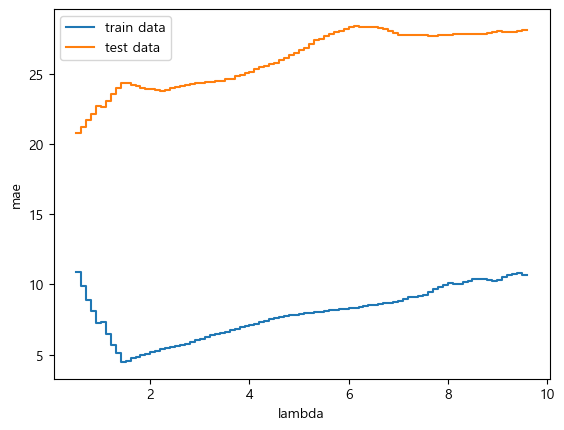

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel("lambda")
ax.set_ylabel("mae")
#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post")
ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores,  label="train data", drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores,  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
#plt.xlim(0,10)
plt.show()
plt.close('all')